In this exercise, a simple dataset of only 1 feature is examined using different models.
The single feature is the signal strength from an X-ray instrument to determine the density of the rock formation for boring equipment that uses different shields for different rock density.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [4]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [5]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

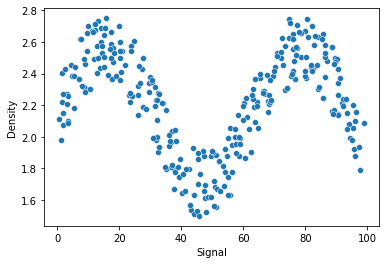

In [7]:
sns.scatterplot(data=df, x='Signal', y='Density')

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Let's try a simple model like linear regression before we make function call to automate the process

In [16]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [20]:
preds = lr_model.predict(X_test)

In [22]:
MAE = mean_absolute_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))

In [23]:
MAE

0.22743045526818492

In [24]:
RMSE

0.2789327760701736

In [43]:
x_range = np.arange(0,100)

In [45]:
y_range = lr_model.predict(x_range.reshape(-1,1))

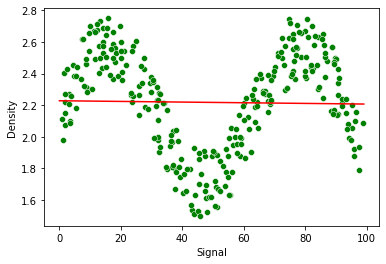

In [48]:
sns.scatterplot(data=df, x='Signal', y='Density', color = 'green')
plt.plot(x_range, y_range, color ='red')

In [81]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    MAE = mean_absolute_error(y_test, preds)
    RMSE = np.sqrt(mean_squared_error(y_test, preds))
    
    print(f'MAE: {MAE}')
    print(f'RMSE: {RMSE}')
    
    x_range = np.arange(0,100)
    y_range = model.predict(x_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(data=df, x='Signal', y='Density', color = 'green')
    plt.plot(x_range, y_range, color ='red')

MAE: 0.22743045526818492
RMSE: 0.2789327760701736


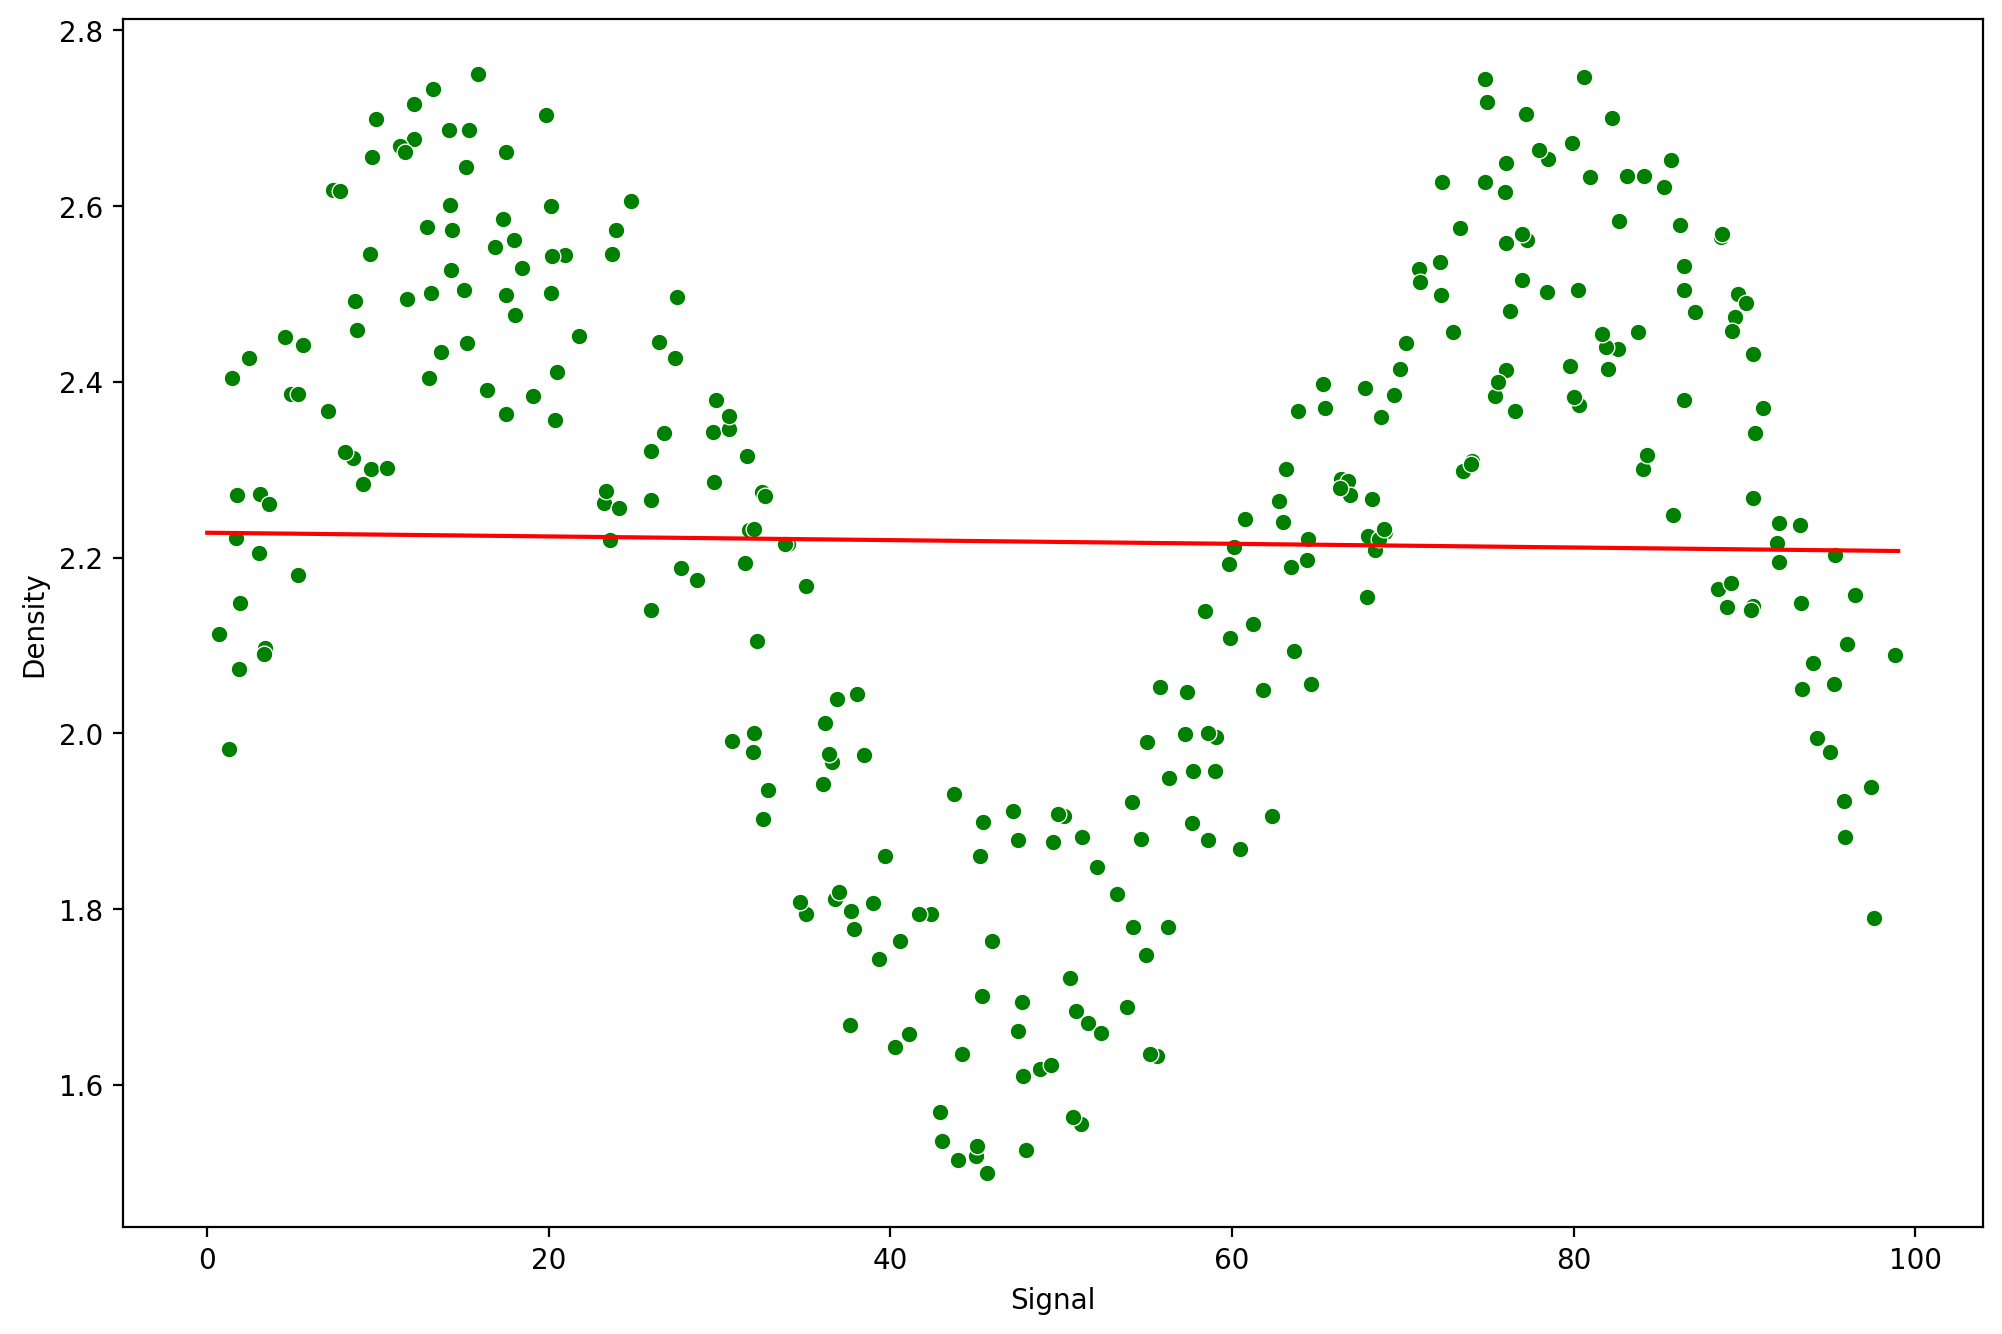

In [82]:
run_model(lr_model, X_train, X_test, y_train, y_test)

In [83]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

MAE: 0.23719091454916091
RMSE: 0.28427638393000965


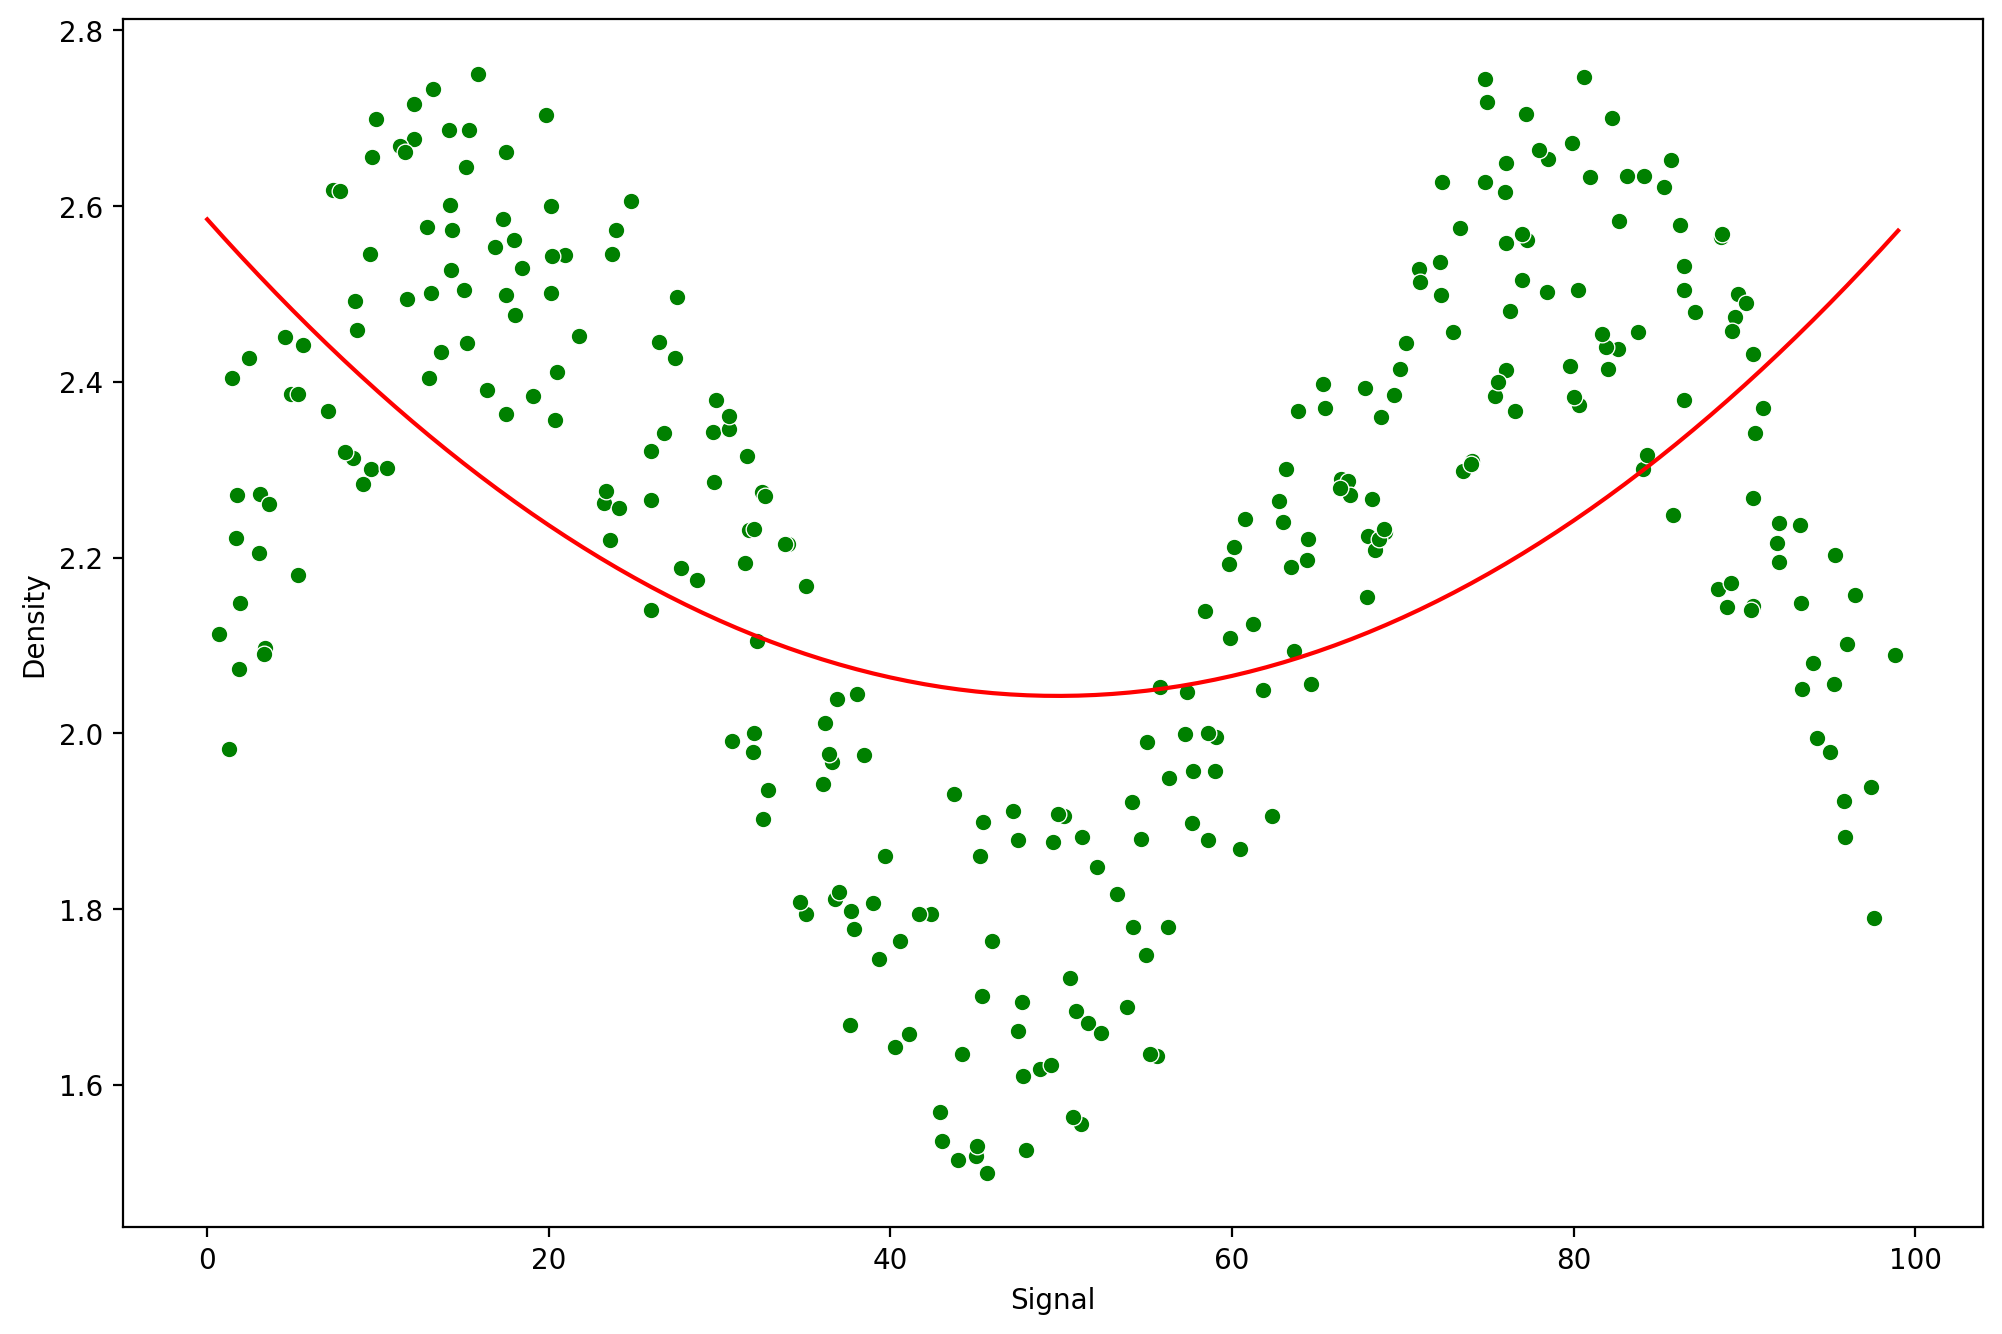

In [84]:
run_model(pipe, X_train, X_test, y_train, y_test)

Trying out a few different polynomial degrees, it seems like degree 6 seems to work quite well

In [85]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

MAE: 0.12309865732773141
RMSE: 0.1402833118656184


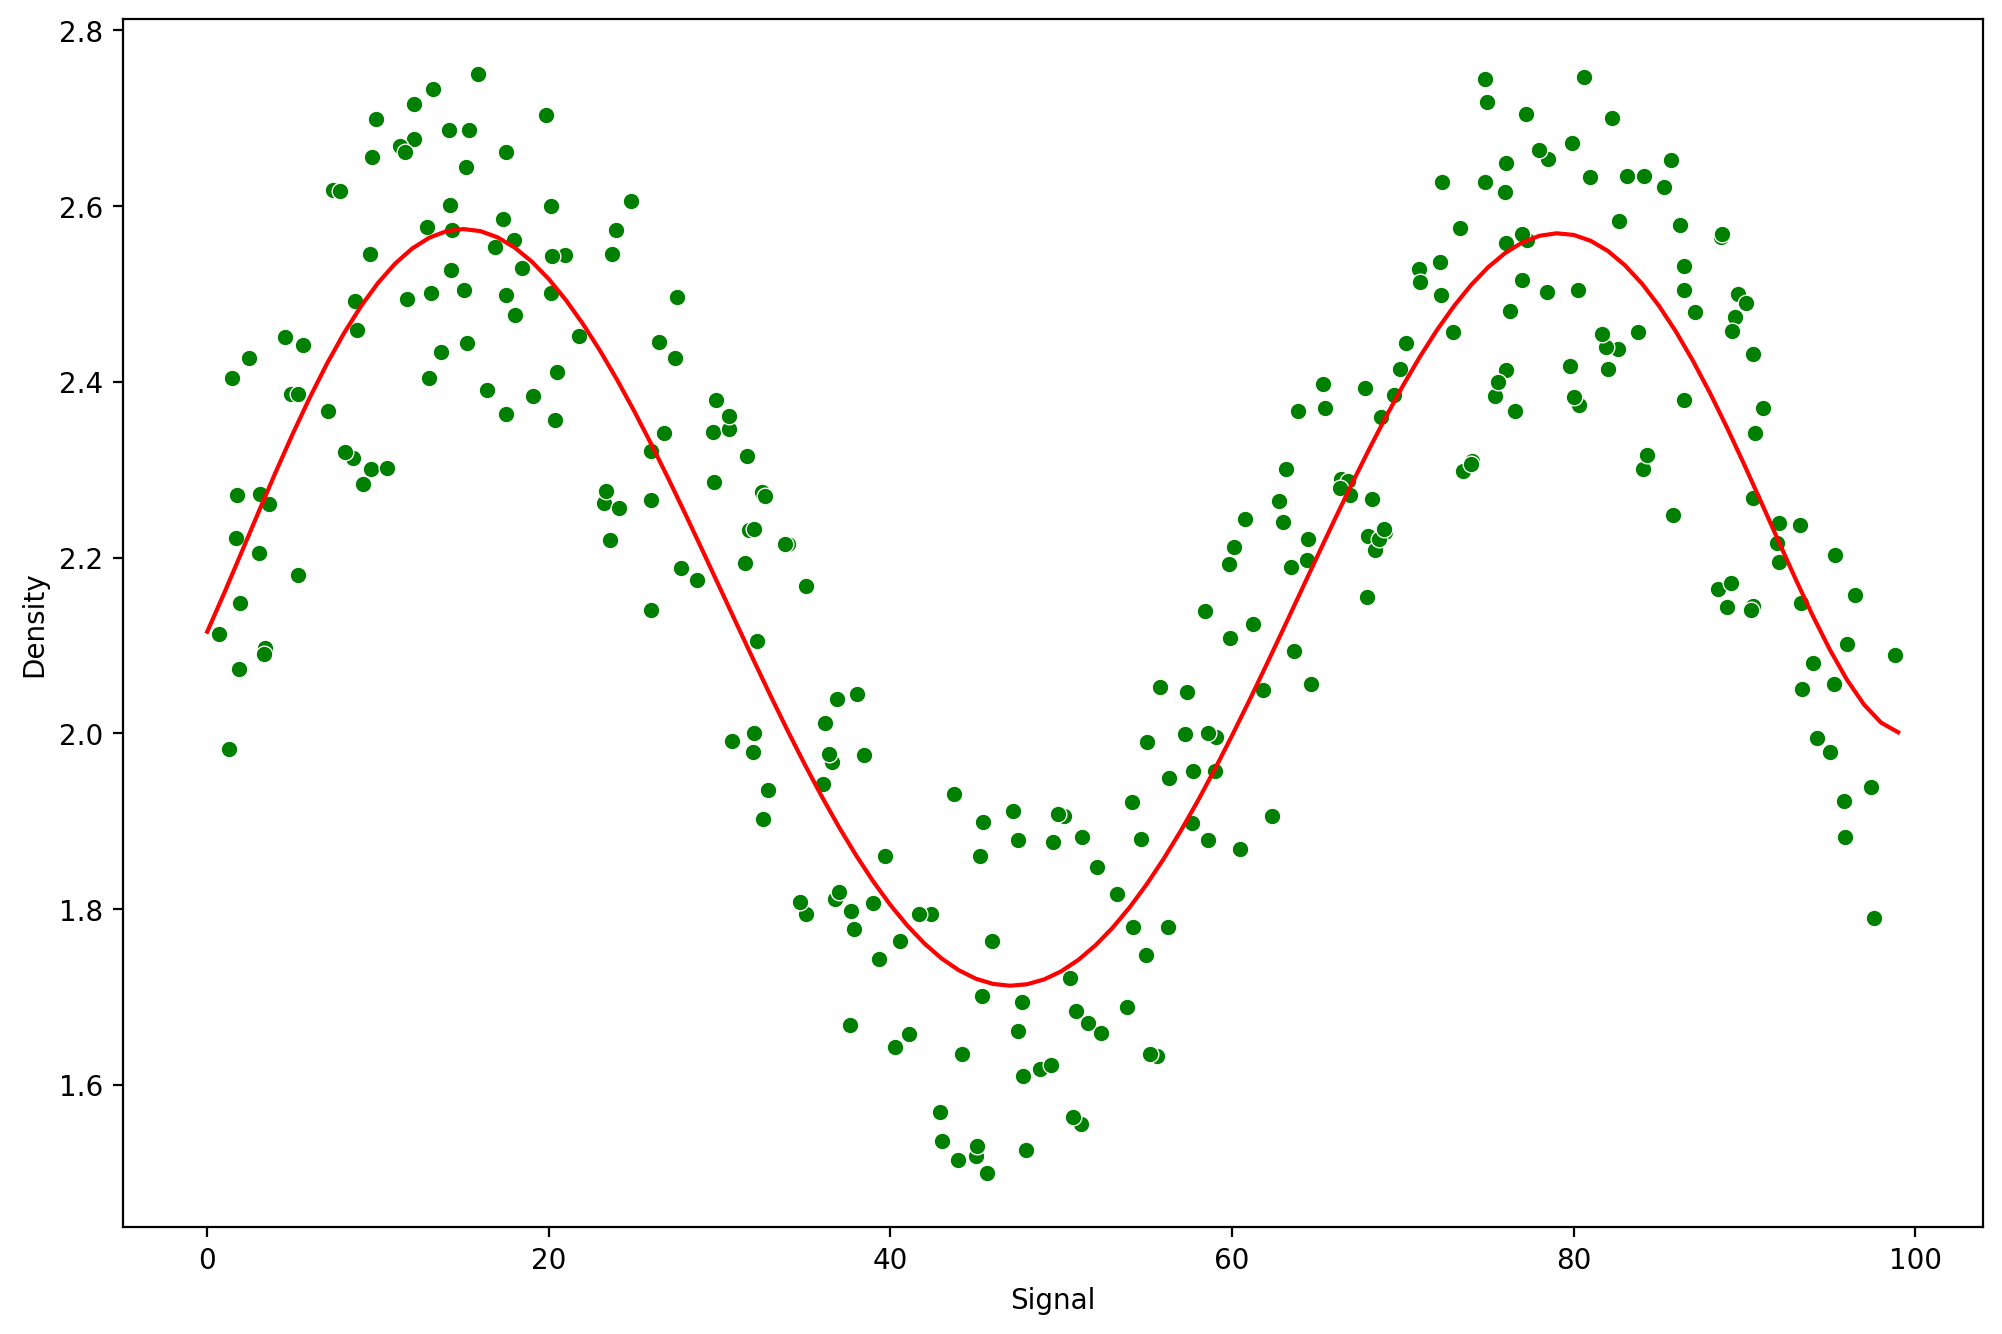

In [86]:
run_model(pipe, X_train, X_test, y_train, y_test)

MAE: 0.13102986428081623
RMSE: 0.16520828197645798
MAE: 0.12637237801280085
RMSE: 0.14516199020256743
MAE: 0.11850108352755381
RMSE: 0.13500627931123657


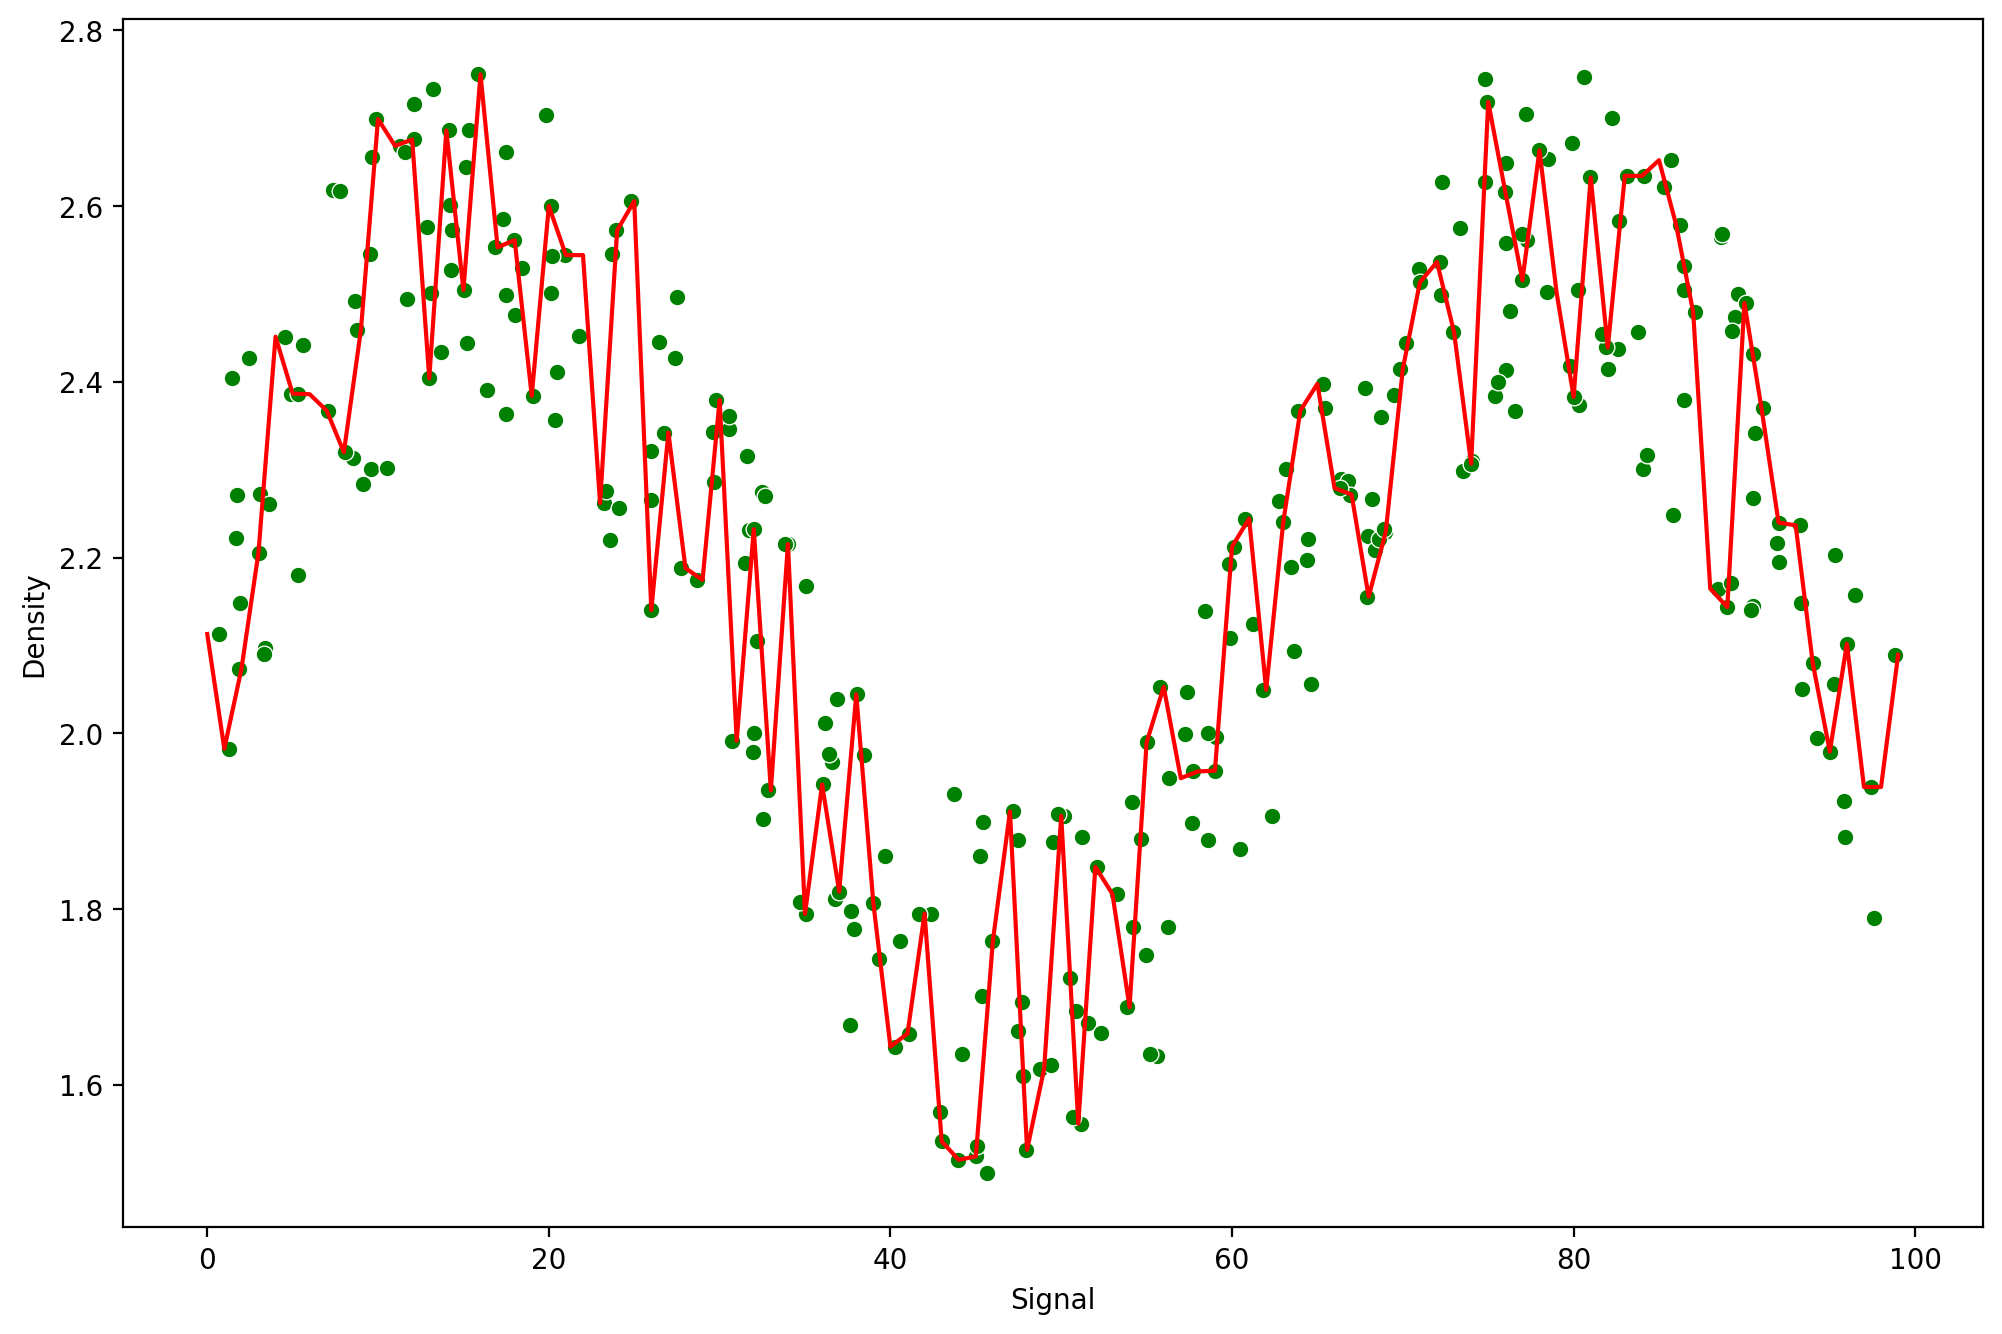

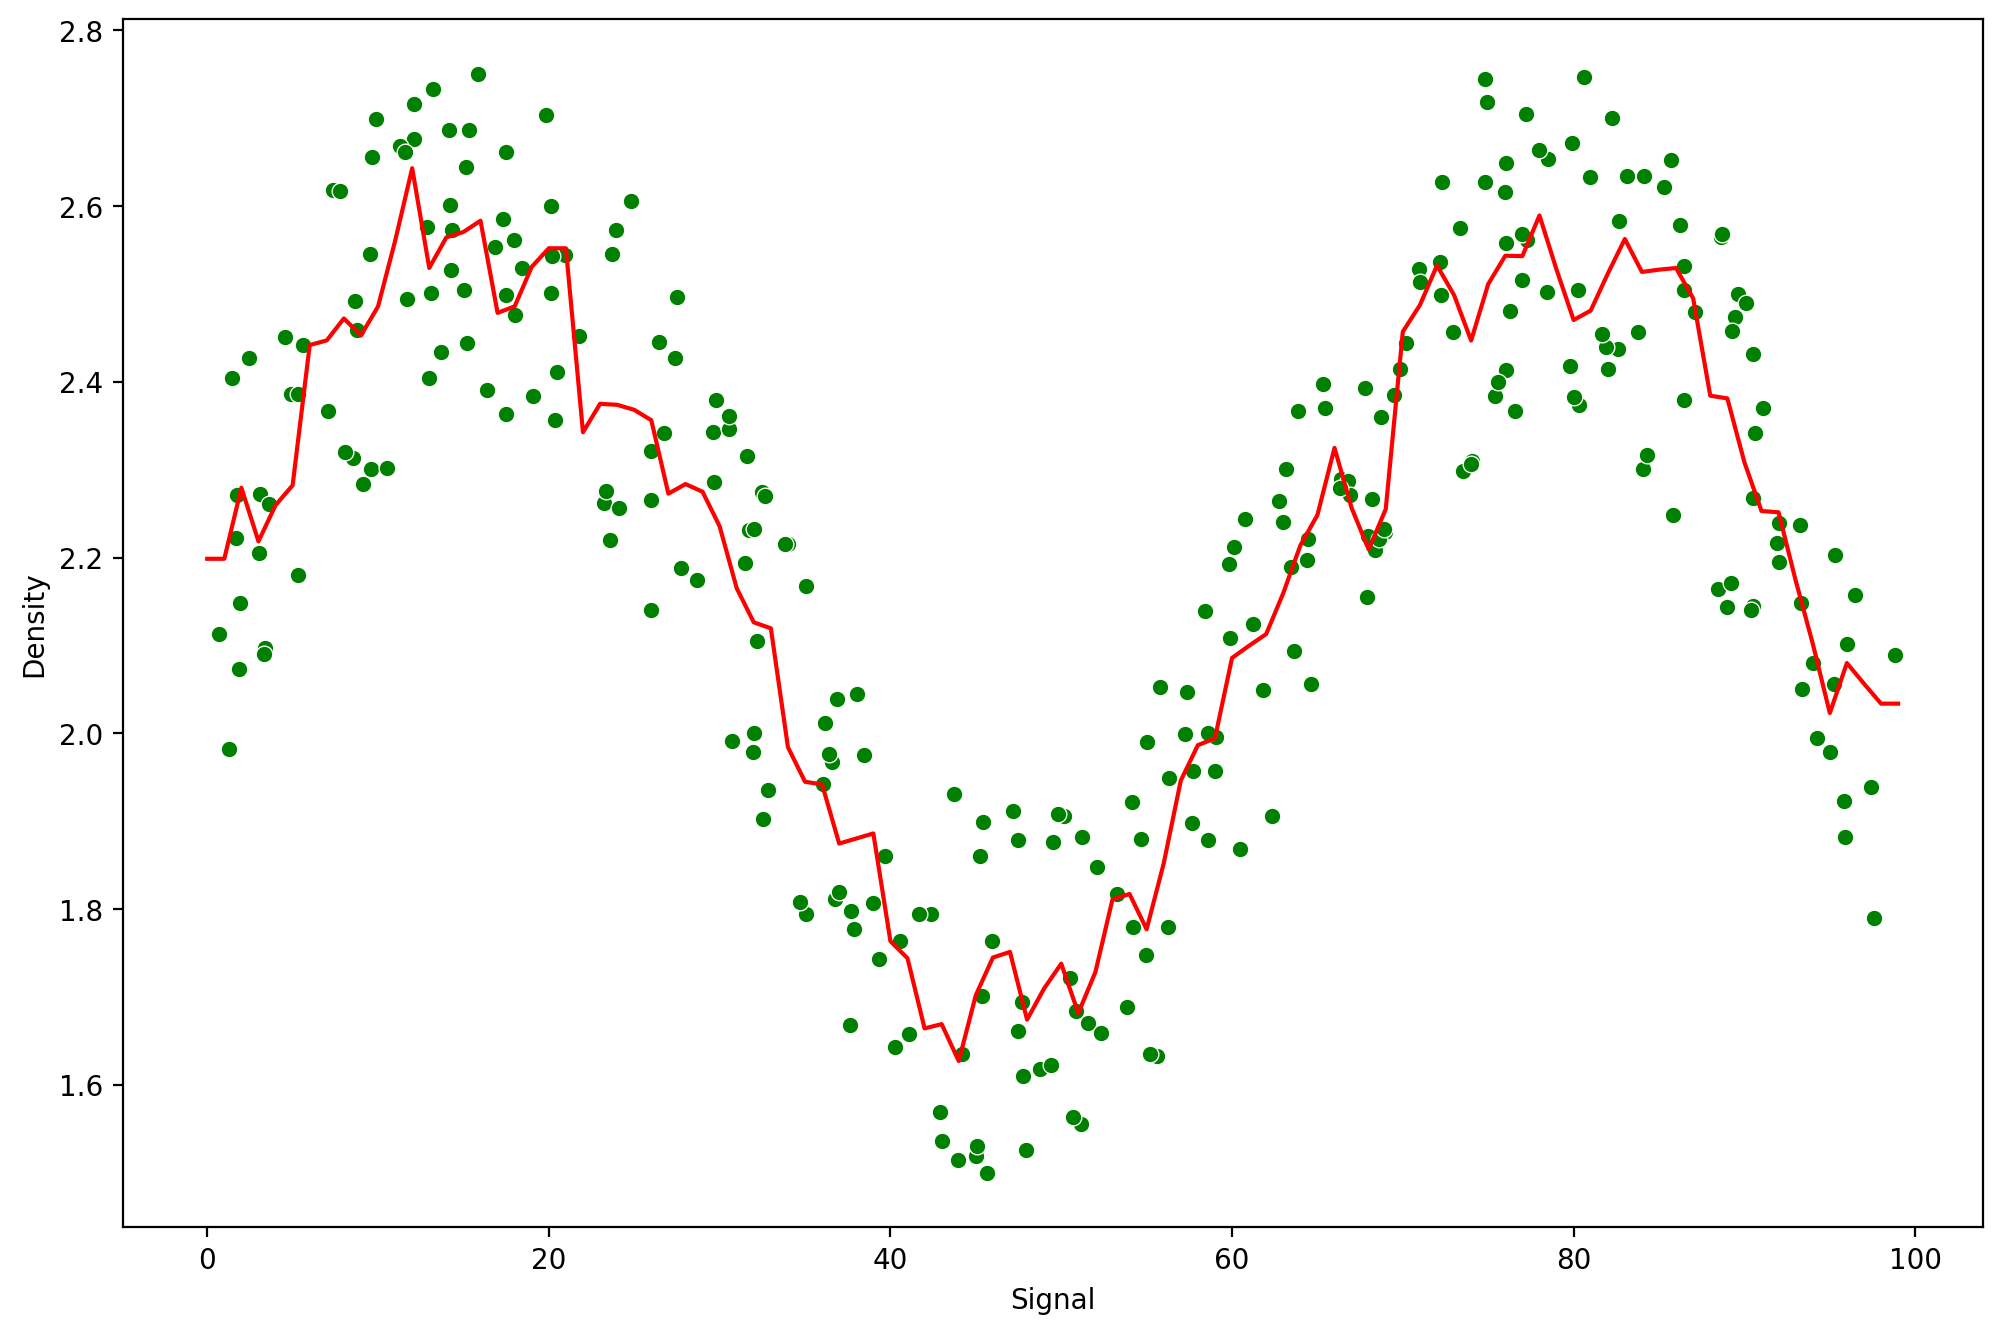

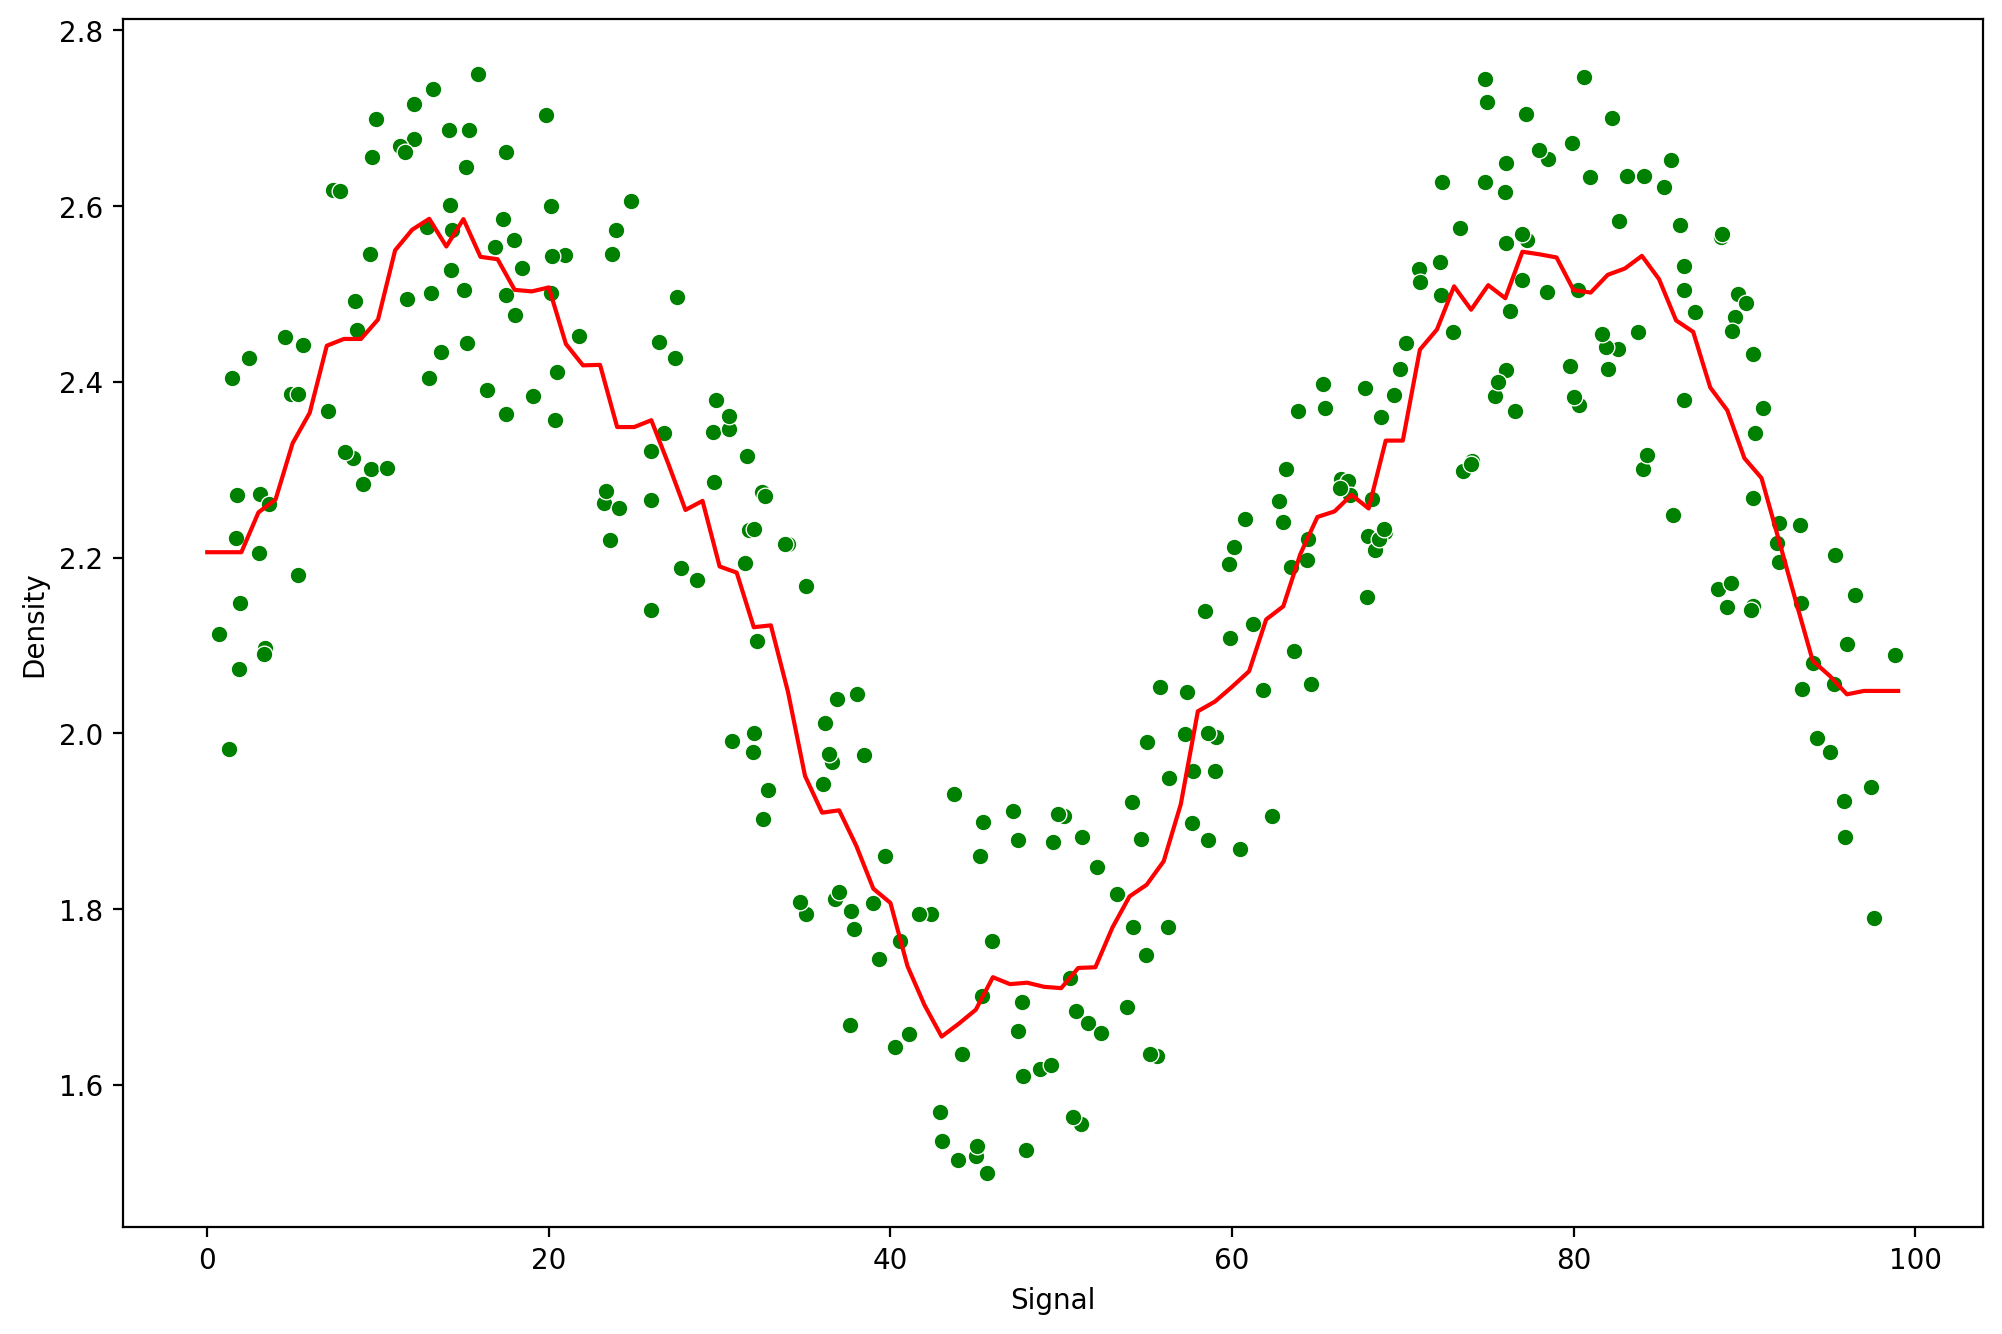

In [89]:
k_values = [1, 5, 10]

for k in k_values:
    k_model = KNeighborsRegressor(n_neighbors = k)
    run_model(k_model, X_train, X_test, y_train, y_test)

In [90]:
svm = SVR()

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10],
             'gamma': ['scale', 'auto']}

In [93]:
grid = GridSearchCV(svm, param_grid)

MAE: 0.1254346118174955
RMSE: 0.13990754873849523


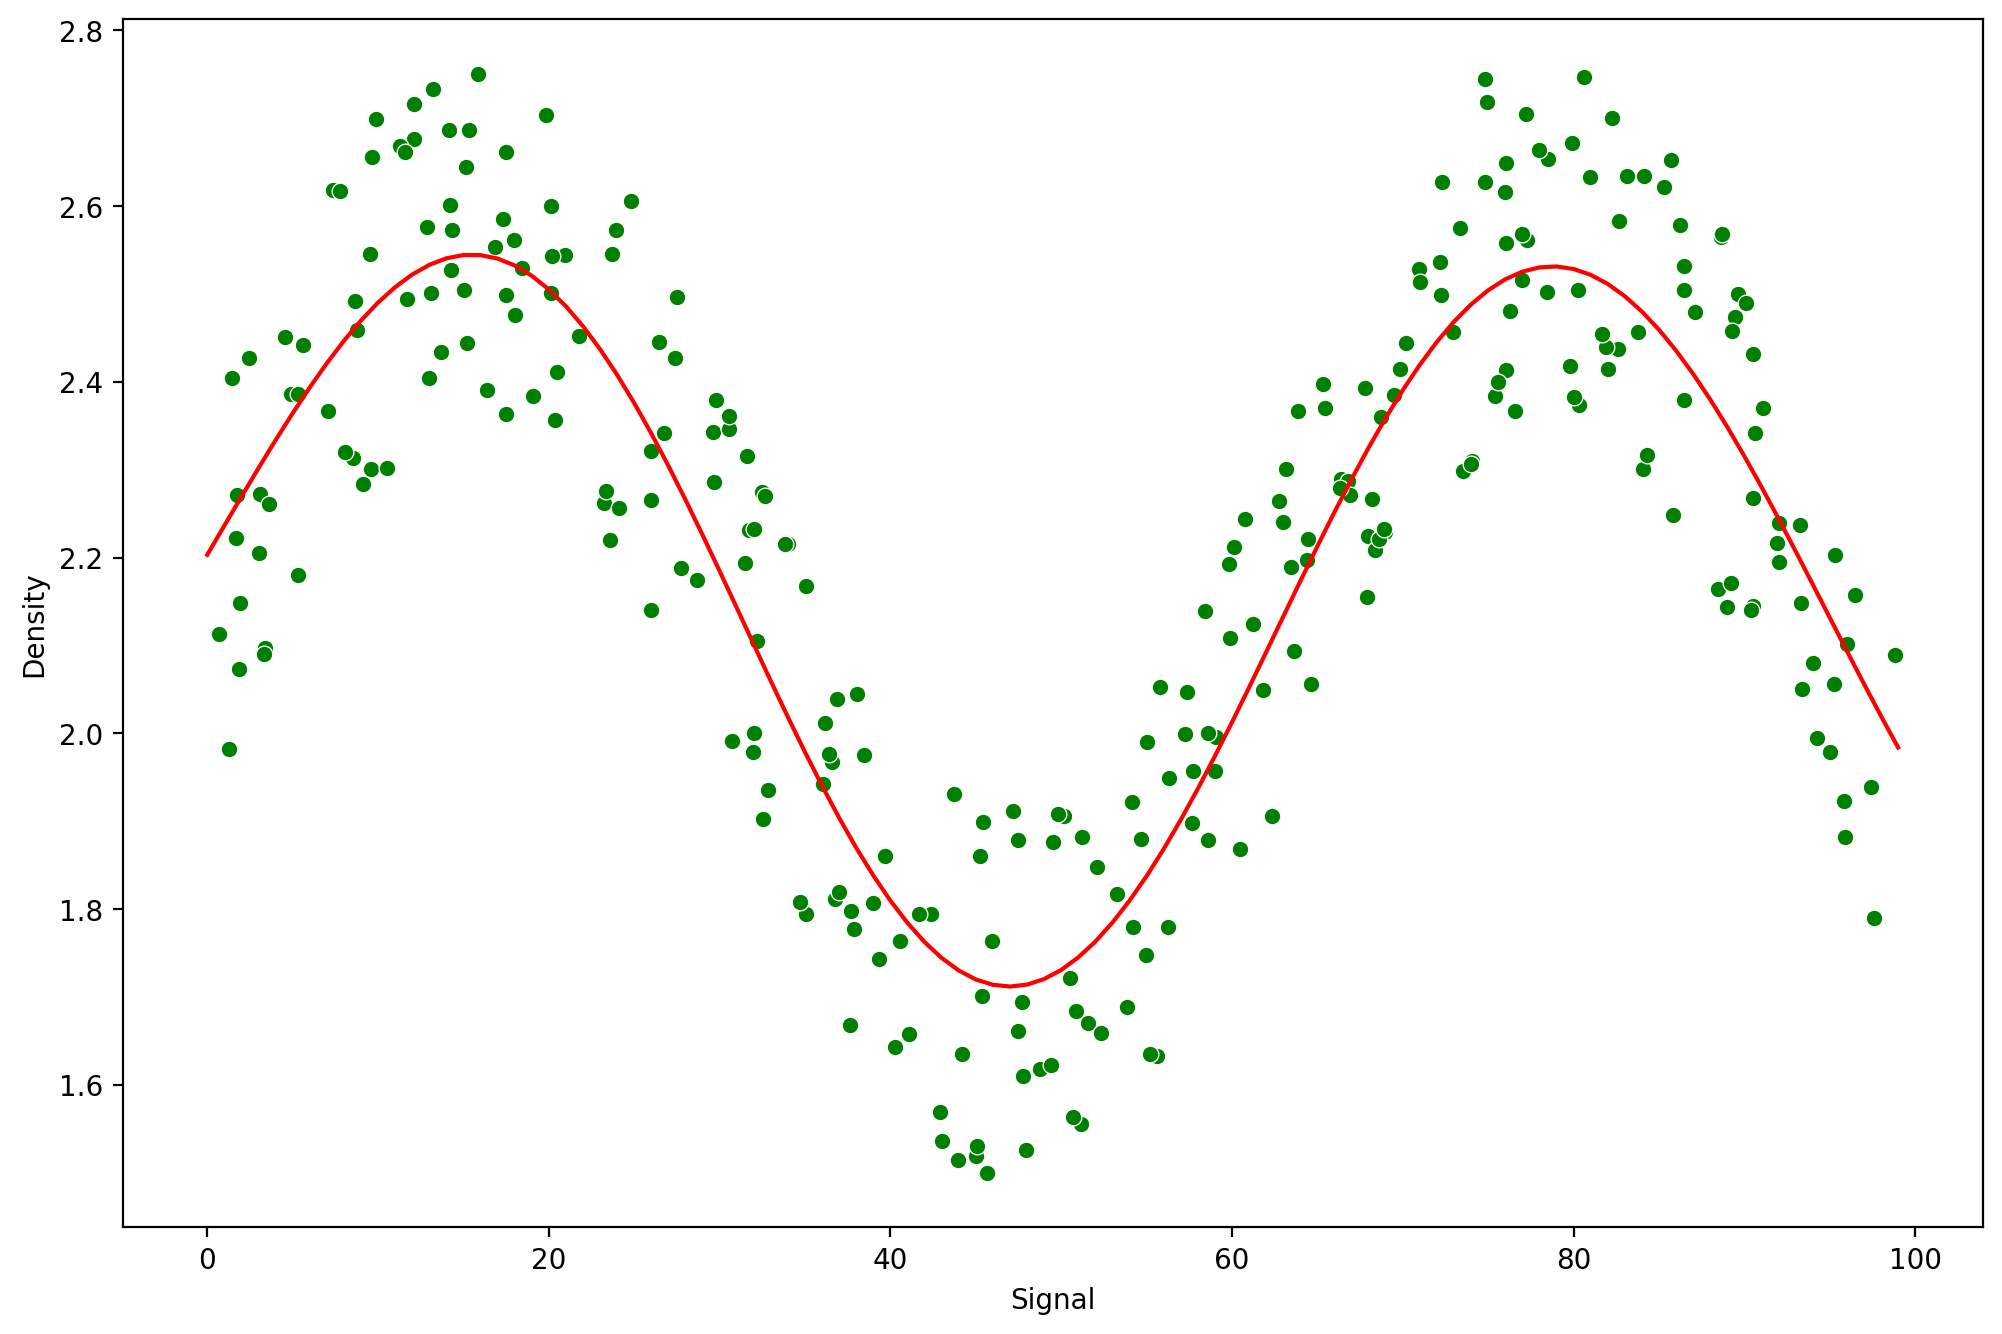

In [94]:
run_model(grid, X_train, X_test, y_train, y_test)

In [95]:
tree = DecisionTreeRegressor()

MAE: 0.13102986428081623
RMSE: 0.16520828197645798


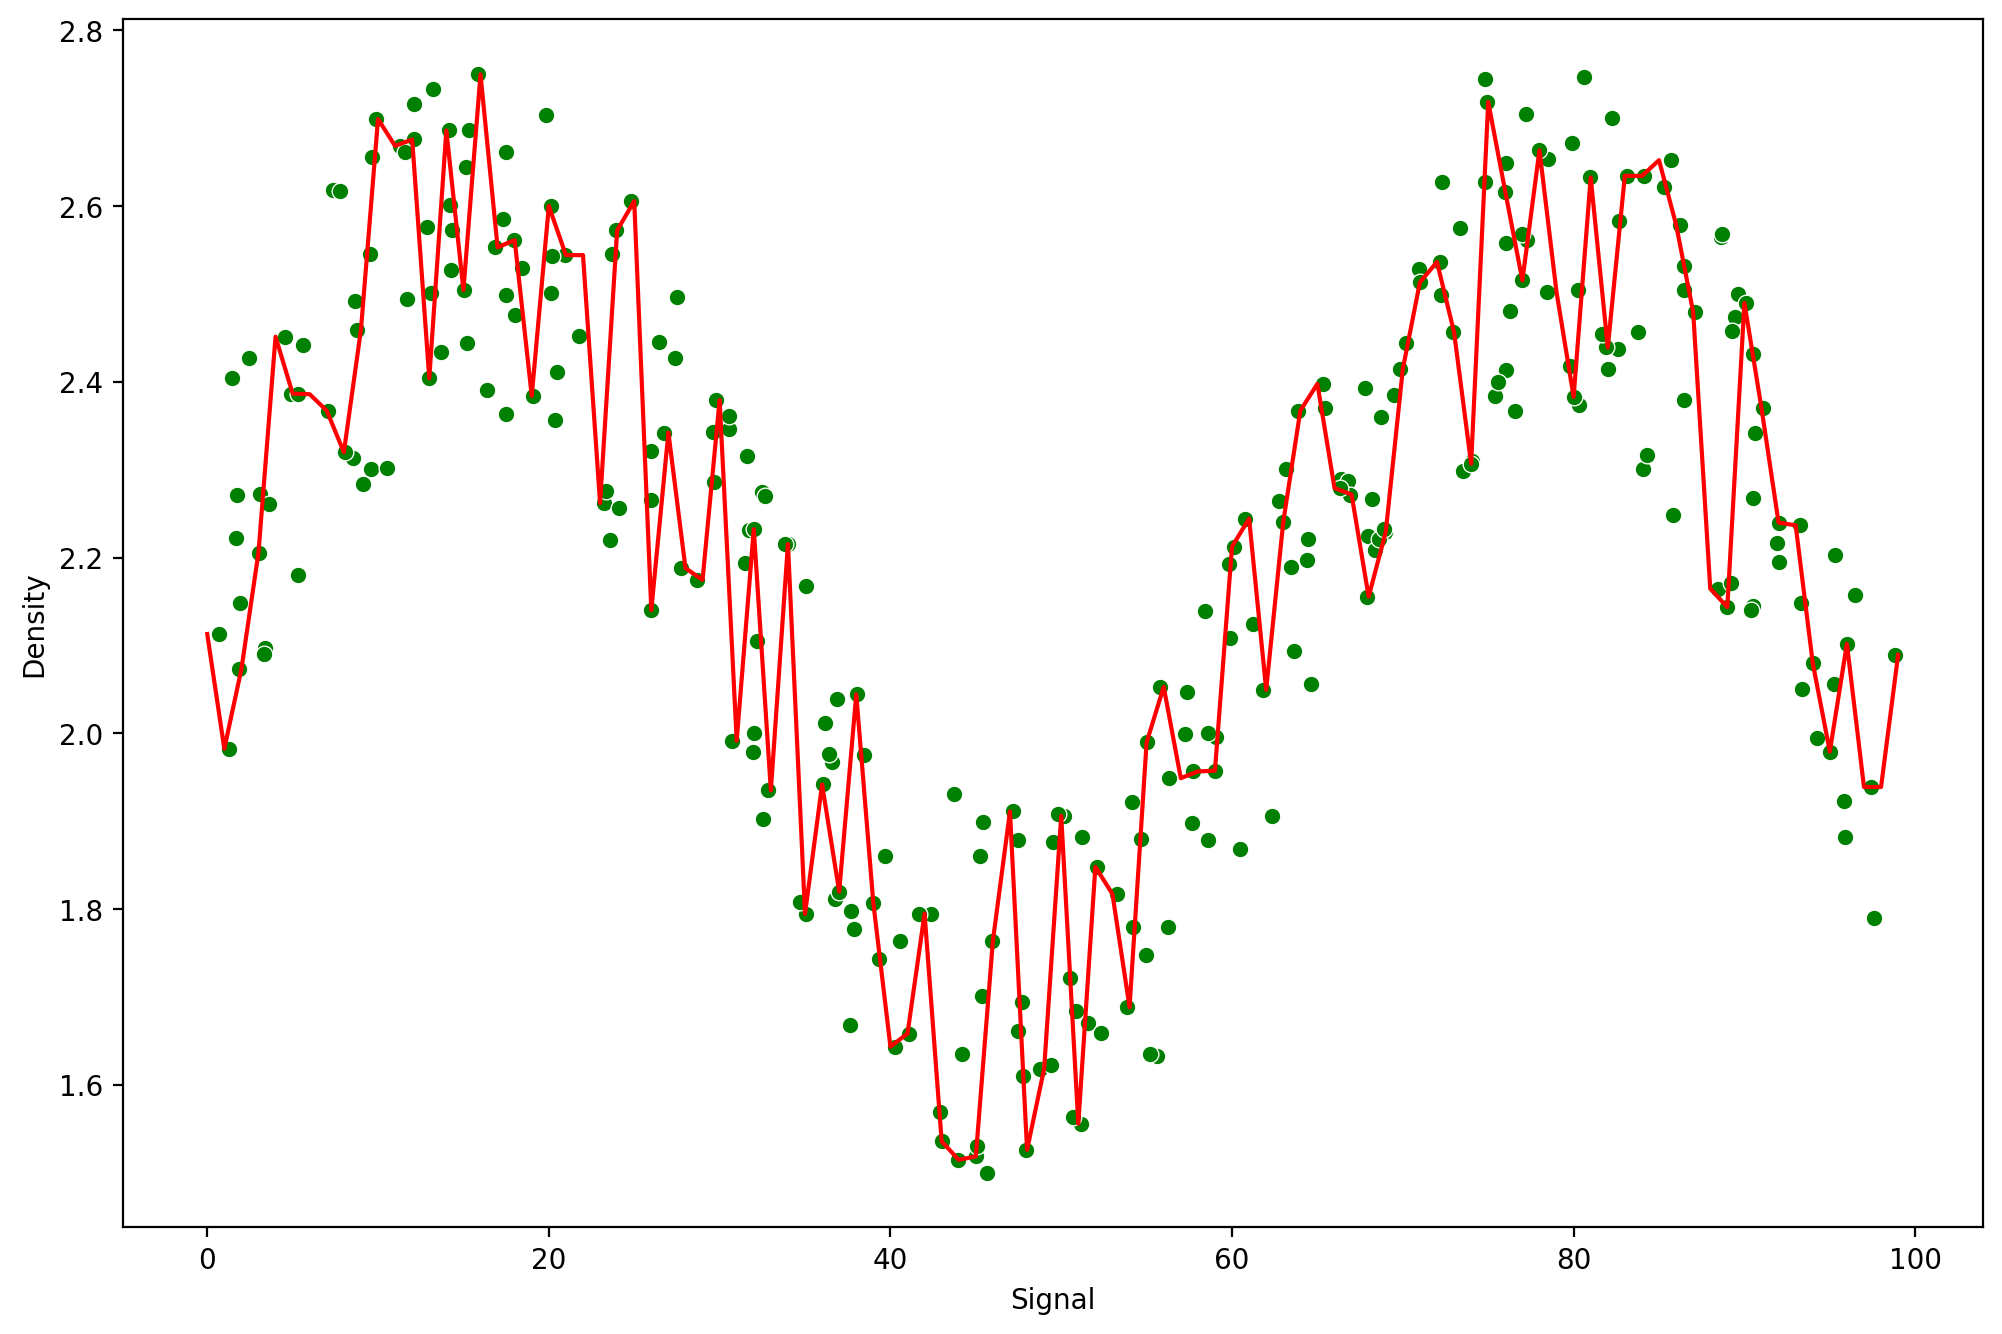

In [96]:
run_model(tree, X_train, X_test, y_train, y_test)

MAE: 0.1482961147394425
RMSE: 0.18708856817522695
MAE: 0.1287981246833099
RMSE: 0.1535262707038613
MAE: 0.12263937263937709
RMSE: 0.14630644348403044
MAE: 0.12073361644010706
RMSE: 0.14549869026116705


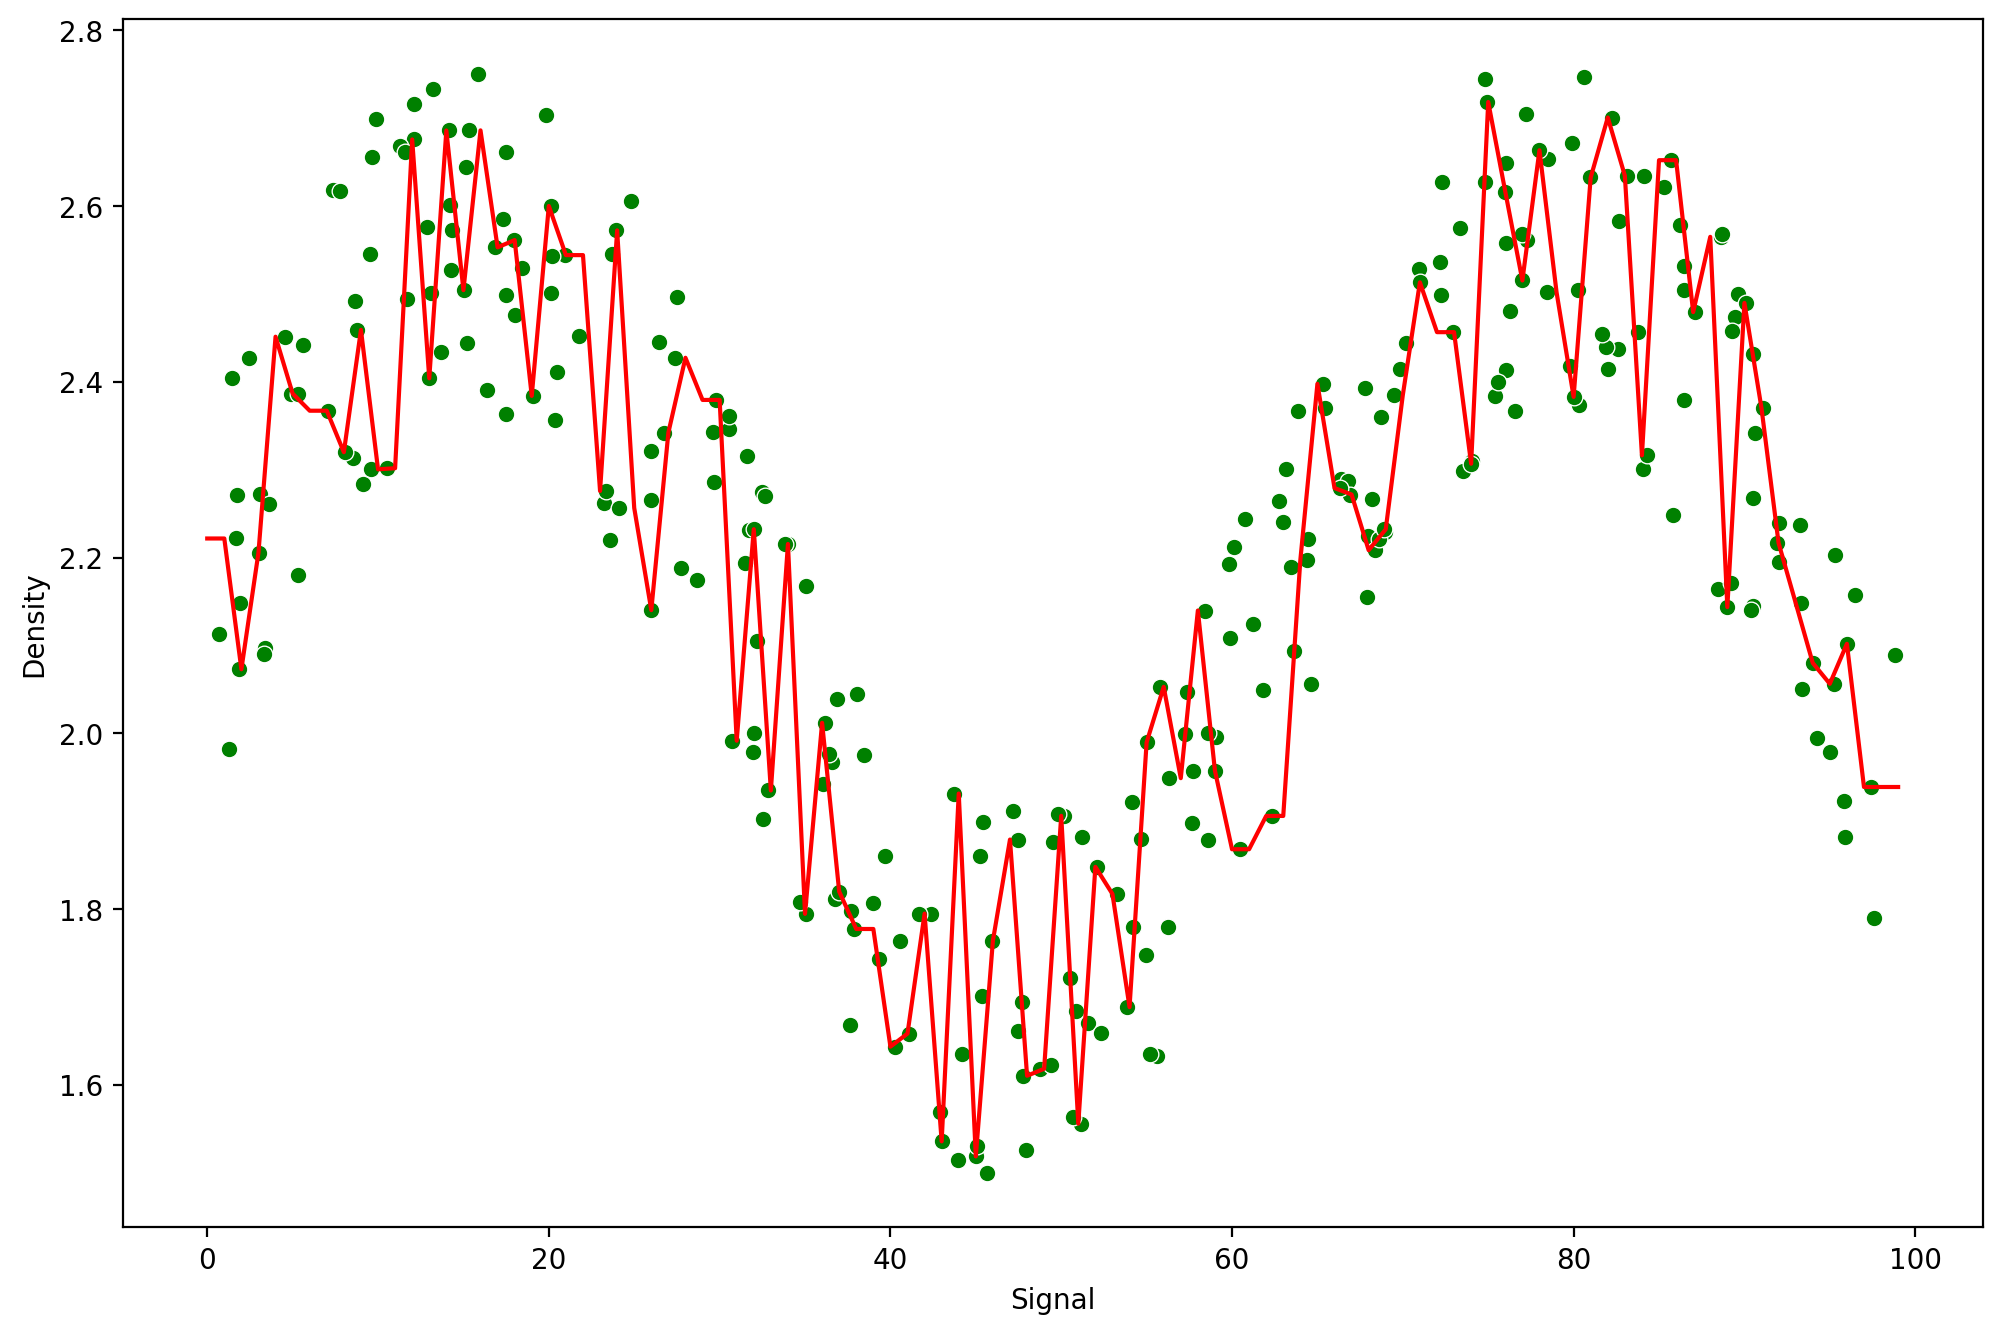

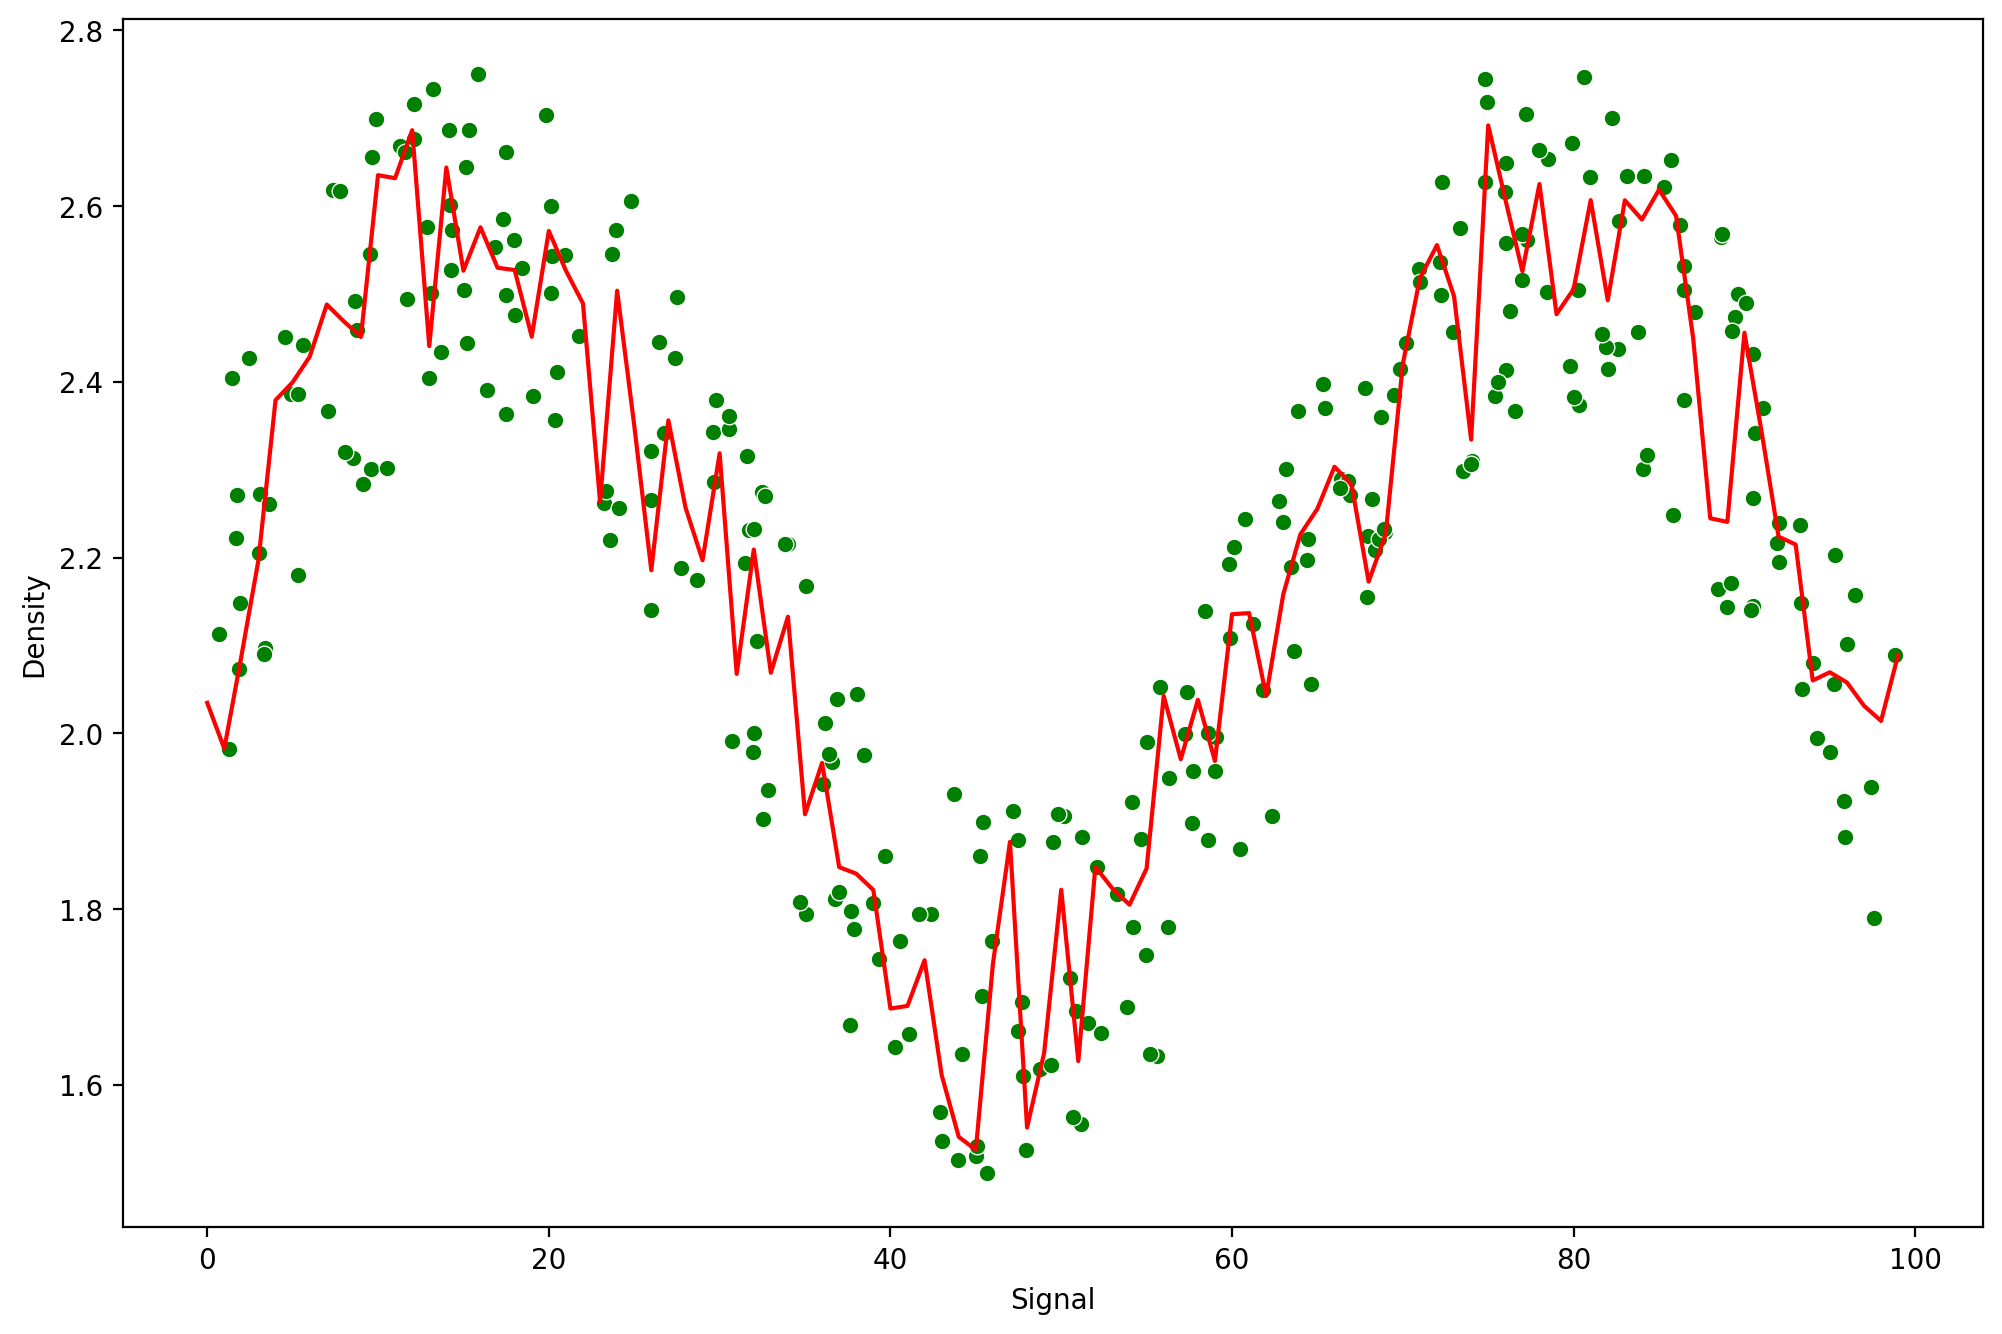

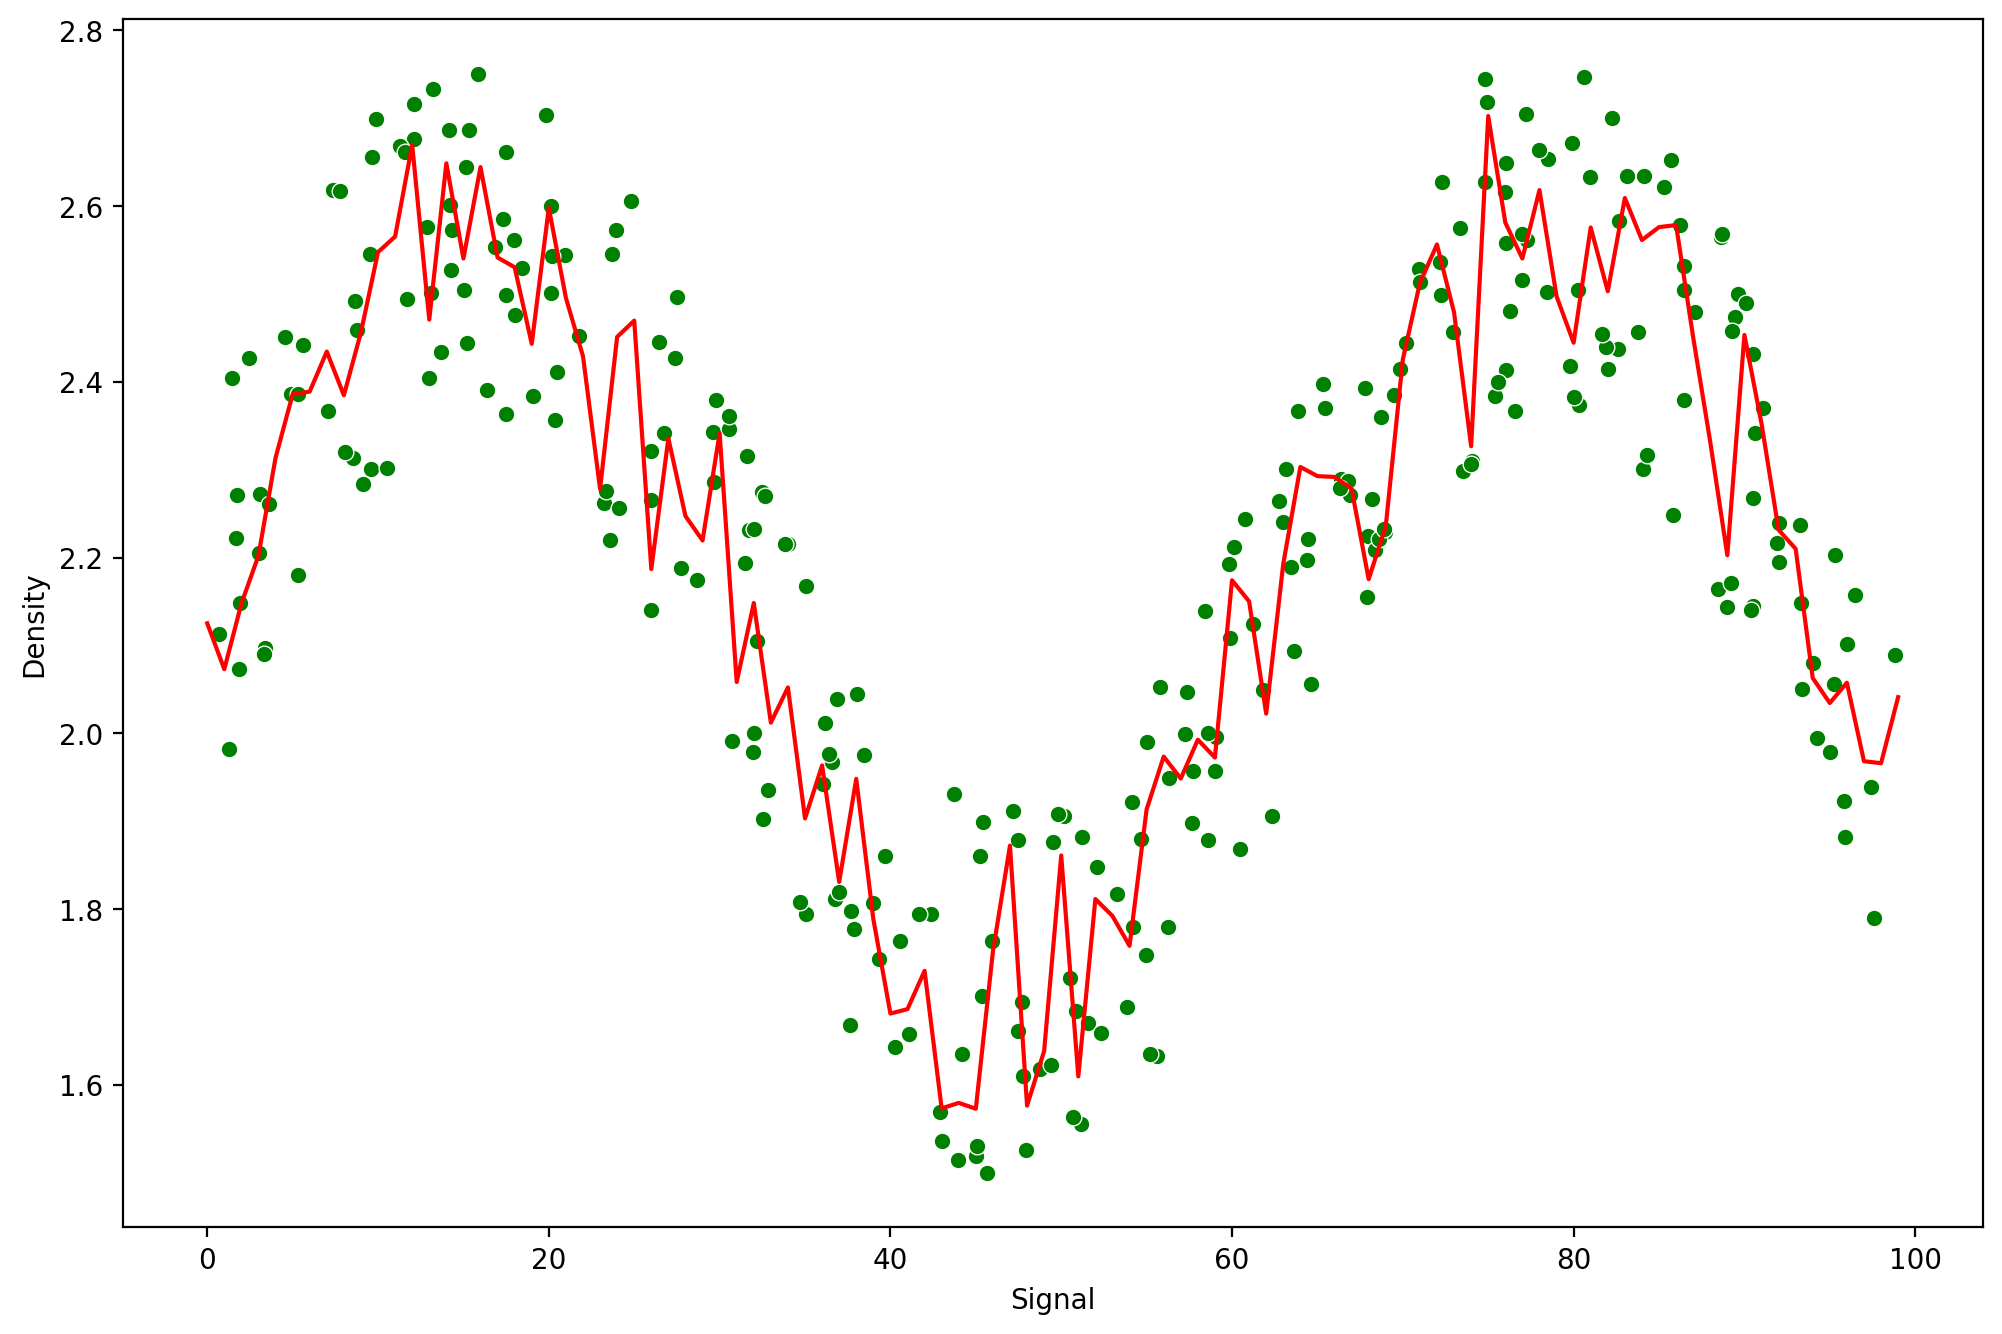

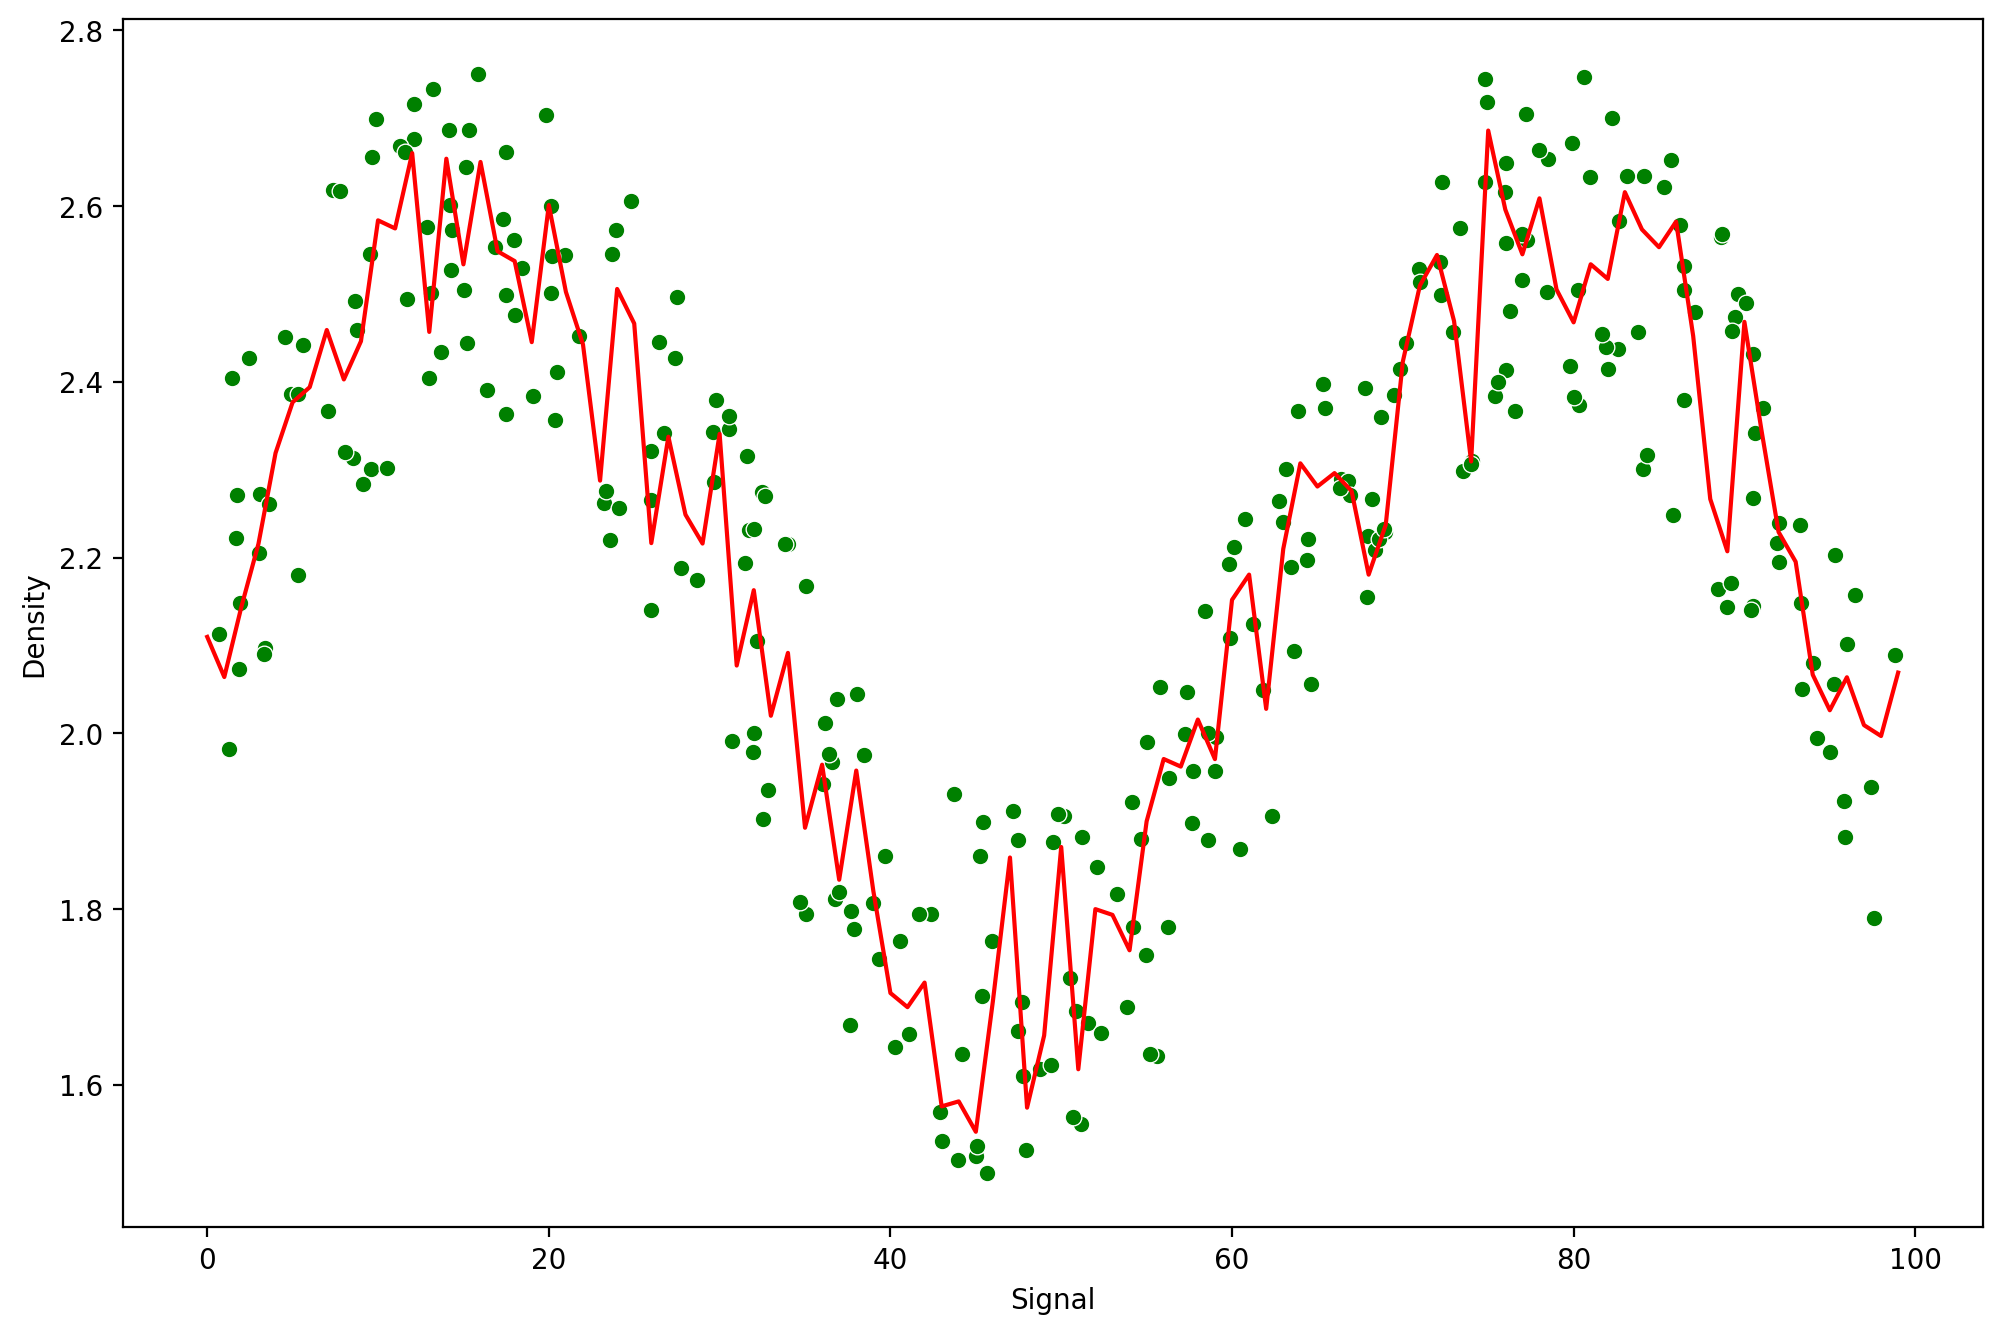

In [98]:
forest = [1, 10, 50, 100]

for k in forest:
    rfr = RandomForestRegressor(n_estimators=k)
    run_model(rfr, X_train, X_test, y_train, y_test)

In [99]:
gradient_model = GradientBoostingRegressor()

MAE: 0.11768930972195804
RMSE: 0.13760286116385637


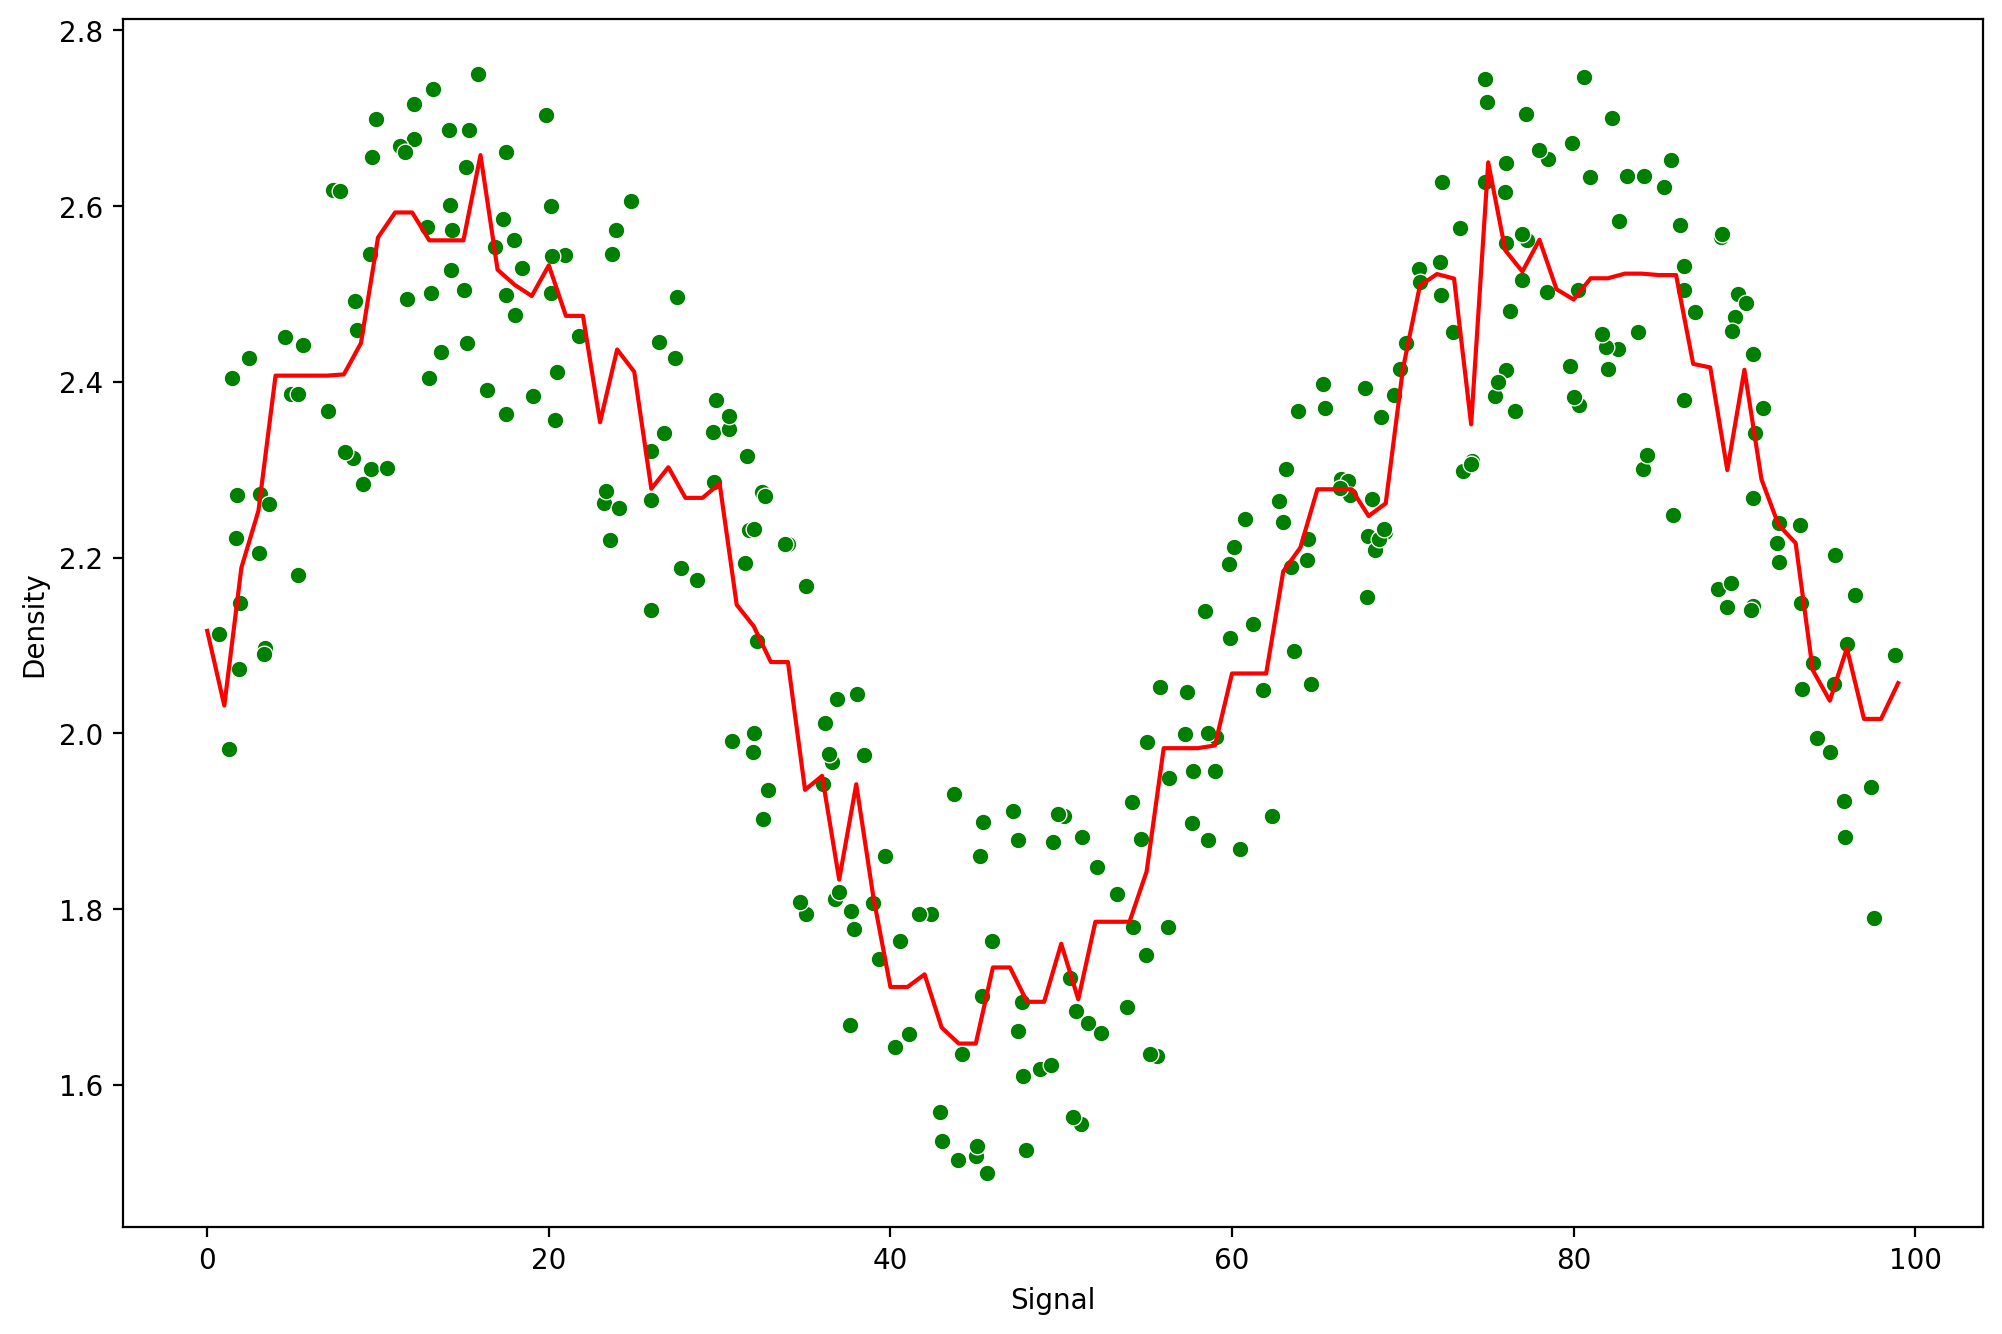

In [100]:
run_model(gradient_model, X_train, X_test, y_train, y_test)

In [101]:
ada_model = AdaBoostRegressor()

MAE: 0.11956534896327164
RMSE: 0.13696827827577737


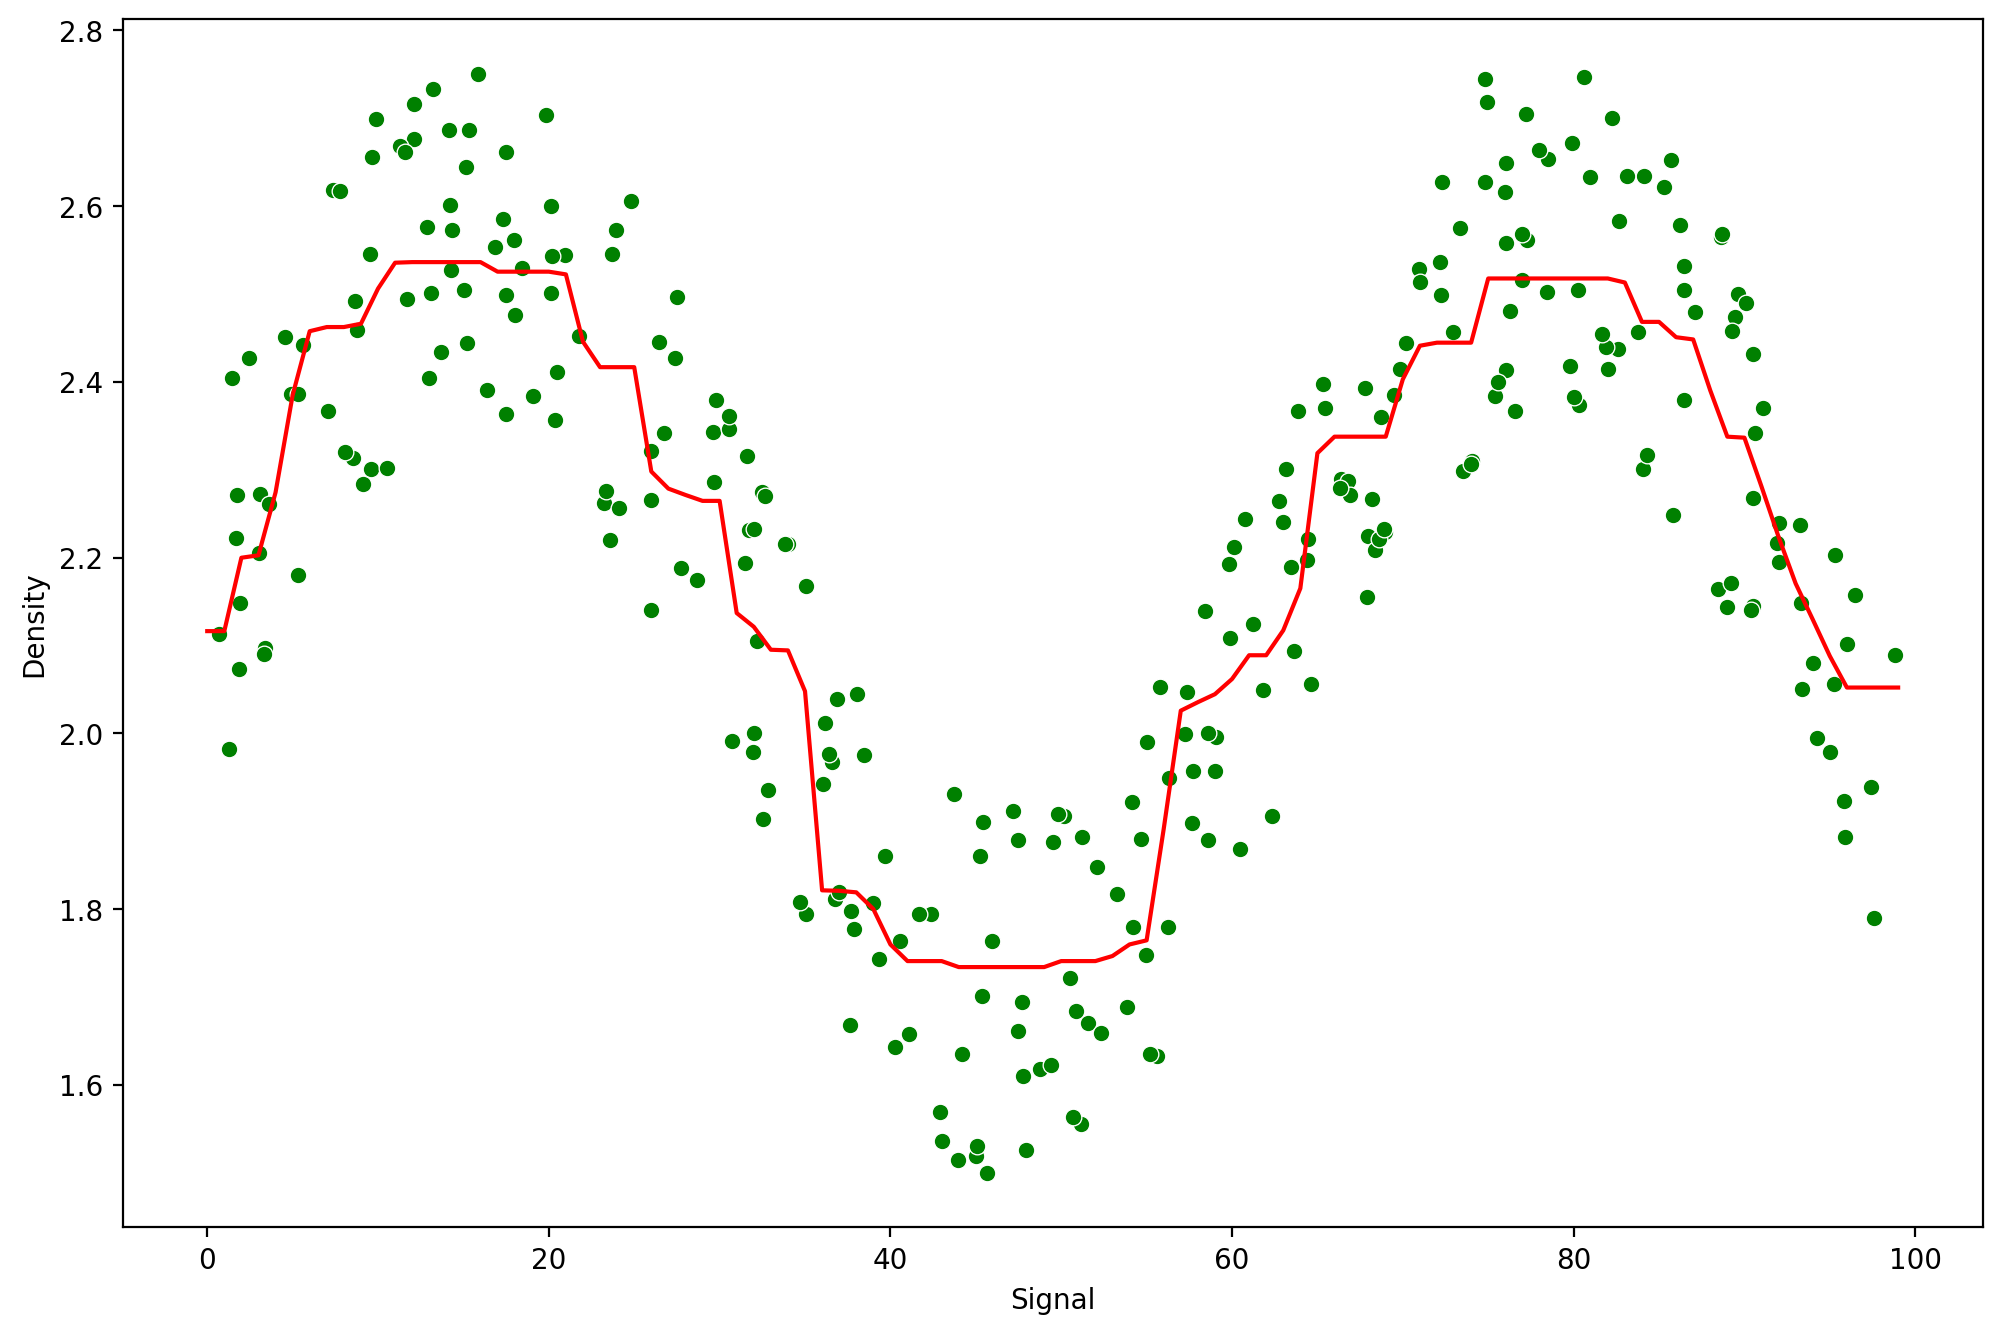

In [102]:
run_model(ada_model, X_train, X_test, y_train, y_test)